In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
C2023II = pd.read_csv(r'C:\Users\Dussand\Desktop\proyectsDS\Python\Scrapping\delete_data\postulantes_por_carrera2023II.csv')
C2024I = pd.read_csv(r'C:\Users\Dussand\Desktop\proyectsDS\Python\Scrapping\delete_data\postulantes_por_carrera2024I.csv')
C2024II = pd.read_csv(r'C:\Users\Dussand\Desktop\proyectsDS\Python\Scrapping\delete_data\postulantes_por_carrera2024II.csv')
C2025I = pd.read_csv(r'C:\Users\Dussand\Desktop\proyectsDS\Python\Scrapping\delete_data\postulantes_por_carrera2025I.csv')

In [3]:
#creamos una columna con el periodo del examen para cada periodo
C2023II['periodo'] = "2023II"
C2024I['periodo'] = "2024I"
C2024II['periodo'] = "2024II"
C2025I['periodo'] = "2025I"



resultados_exam.tail()

In [4]:
# resultados_exam.to_csv('resultados_consolidados.csv', index=False)

In [5]:
        #cambiamos el nombre de las columnas
columns = {
    'CODIGO':'student_id',
    'APELLIDOS Y NOMBRES':'full_name',
    'ESCUELA PROFESIONAL':'career_1',
    'PUNTAJE FINAL':'score',
    'MERITOE.P':'merit_order',
    'OBSERVACI&OacuteN':'observation'
}

C2023II.rename(columns=columns, inplace = True)

C2023II.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24553 entries, 0 to 24552
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   24553 non-null  int64  
 1   full_name    24553 non-null  object 
 2   career_1     24553 non-null  object 
 3   score        24099 non-null  float64
 4   merit_order  3751 non-null   float64
 5   observation  4205 non-null   object 
 6   periodo      24553 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.3+ MB


In [6]:
columns = {
    'CODIGO':'student_id',
    'APELLIDOS Y NOMBRES':'full_name',
    'ESCUELA PROFESIONAL':'career_1',
    'PUNTAJE FINAL':'score',
    'MERITOE.P ALCANZA VACANTE':'merit_order',
    'OBSERVACI&OacuteN':'observation',
    'ESCUELA SEGUNDA OPCIÓN':'career_2'
}

C2024I.rename(columns=columns, inplace = True)

C2024I.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28862 entries, 0 to 28861
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   28862 non-null  int64  
 1   full_name    28862 non-null  object 
 2   career_1     28862 non-null  object 
 3   score        28527 non-null  float64
 4   merit_order  2124 non-null   float64
 5   observation  2459 non-null   object 
 6   career_2     303 non-null    object 
 7   periodo      28862 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.8+ MB


In [7]:
columns = {
    'CODIGO':'student_id',
    'APELLIDOS Y NOMBRES':'full_name',
    'ESCUELA PROFESIONAL (PRIMERA OPCIÓN)':'career_1',
    'PUNTAJE':'score',
    'MERITOE.P':'merit_order',
    'OBSERVACI&OacuteN':'observation',
    'ESCUELA PROFESIONAL (SEGUNDA OPCIÓN)':'career_2'
}

C2024II.rename(columns=columns, inplace = True)

C2024II.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22077 entries, 0 to 22076
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   22077 non-null  int64  
 1   full_name    22077 non-null  object 
 2   career_1     22077 non-null  object 
 3   score        21868 non-null  float64
 4   merit_order  2630 non-null   float64
 5   observation  2839 non-null   object 
 6   career_2     512 non-null    object 
 7   periodo      22077 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.3+ MB


In [8]:
# #cambiamos el nombre de las columnas
columns = {
     'CODIGO':'student_id',
     'APELLIDOS Y NOMBRES':'full_name',
     'ESCUELA PROFESIONAL':'career_1',
     'PUNTAJE':'score',
     'MERITOE.P':'merit_order',
     'OBSERVACI&OacuteN':'observation'
 }

C2025I.rename(columns=columns, inplace = True)

C2025I.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   18650 non-null  int64  
 1   full_name    18650 non-null  object 
 2   career_1     18650 non-null  object 
 3   score        18468 non-null  float64
 4   merit_order  2136 non-null   float64
 5   observation  2318 non-null   object 
 6   periodo      18650 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1020.1+ KB


In [9]:
C2025I.head()

,student_id,full_name,career_1,score,merit_order,observation,periodo
0,785931,"ABANTO MUÃOZ, JIMENA GUADALUPE",DERECHO,691.000,NaN,NaN,2025I
1,745149,"ABREGU MALLCO, DIEGO GABRIEL",DERECHO,983.625,NaN,NaN,2025I
2,729580,"ACERO CLAROS, MICHAEL JHON",DERECHO,1088.750,NaN,NaN,2025I
3,841587,"ACHAMIZO AYALA, KARITHO RISONNY",DERECHO,987.125,NaN,NaN,2025I
4,772196,"ACLARI GARCIA, ADRIANA MAYRIN",DERECHO,966.500,NaN,NaN,2025I


In [10]:
#anexamos los dataframes

resultados_exam = pd.concat([C2023II, C2024I, C2024II, C2025I], ignore_index = True)

In [11]:
resultados_exam.sample(10)

,student_id,full_name,career_1,score,merit_order,observation,periodo,career_2
41328,571589,"MUÃOZ RIOS, MERLI EDITA",CONTABILIDAD - LIMA,410.250,NaN,NaN,2024I,NaN
5879,811454,"CADILLO CARBAJAL, LEIDY YADIRA",DERECHO,457.875,NaN,NaN,2023II,NaN
47510,291280,"SIFUENTES CADENAS, FABIOLA LUPE",INGENIERÍA INDUSTRIAL,566.000,NaN,NaN,2024I,NaN
76327,741008,"FRANCIA RAMOS, ANGELO DICKEL",DERECHO,952.875,NaN,NaN,2025I,NaN
69949,284830,"SÁNCHEZ ENRÍQUEZ, ALEJANDRO",INGENIERÍA CIVIL,1295.250,9.0,ALCANZO VACANTE PRIMERA OPCIÃN,2024II,NaN
78037,802533,"FLORES CANTERAC, KAROL FABIAN",CIENCIA POLÍTICA,1016.250,NaN,NaN,2025I,NaN
19537,273833,"SAENZ GARCIA, DANIELA ALEJANDRA",INGENIERÍA INDUSTRIAL,307.375,NaN,NaN,2023II,NaN
23468,308419,"RAMIREZ HUAMAN, CHRISTOPHER RAMIREZ",INGENIERÍA DE SISTEMAS,397.250,NaN,NaN,2023II,NaN
54451,878305,"DE LA CRUZ AQUINO, HARRYSON DOMINIK",MEDICINA HUMANA,605.750,NaN,NaN,2024II,NaN
28305,881476,"POCCO PARIONA, BRAYAN JEREMY",MEDICINA HUMANA,902.625,NaN,NaN,2024I,NaN


In [12]:
resultados_exam['location'] = resultados_exam['career_1'].str.extract(r' - (.+)')  # Extraer 'LIMA'
resultados_exam['career_1'] = resultados_exam['career_1'].str.replace(r' - .+', '', regex=True)  # Remover '- LIMA' de 'career_1'

In [13]:
resultados_exam.sample(10)

,student_id,full_name,career_1,score,merit_order,observation,periodo,career_2,location
7714,744979,"TERRAZAS SERPA, SUSANA EMILIA",DERECHO,878.375,NaN,NaN,2023II,NaN,NaN
16072,214820,"VALENZUELA CORONEL, RODRIGO",FÍSICA,824.000,8.0,ALCANZO VACANTE,2023II,NaN,NaN
75725,804132,"BAYLÓN CHAVEZ, ARACELY DENISSE",DERECHO,788.500,NaN,NaN,2025I,NaN,NaN
76600,725649,"IZQUIERDO VILLODAS, EMI NAOMI",DERECHO,797.125,NaN,NaN,2025I,NaN,NaN
5391,173330,"CABALLERO TITO, JOHAN JESUS",NUTRICION,357.250,NaN,NaN,2023II,NaN,NaN
84518,584471,"ACEVEDO PAHUARA, EVELYN DANAE",ECONOMÍA,583.625,NaN,NaN,2025I,NaN,NaN
24840,873939,"AQUIÃO FIGUEROA, SARITA BRENDA",MEDICINA HUMANA,426.875,NaN,NaN,2024I,NaN,NaN
75785,775944,"CABALLERO CALISAYA, CARLA FIORELLA",DERECHO,932.125,NaN,NaN,2025I,NaN,NaN
9698,172935,"DAVILA ORTIZ, GABRIELA ALEXANDRA",ODONTOLOGÍA,518.375,NaN,NaN,2023II,NaN,NaN
85792,219901,"BRONCANO QUITO, KELLY JHANELY",FÍSICA,689.625,NaN,NaN,2025I,NaN,NaN


In [14]:
resultados_exam['periodo'].unique()

array(['2023II', '2024I', '2024II', '2025I'], dtype=object)

In [15]:
resultados_exam['observation'].unique()

array([nan, 'ALCANZO VACANTE', 'AUSENTE',
       'ALCANZO VACANTE SEGUNDA OPCIÓN', 'ANULADO',
       'ALCANZO VACANTE SEGUNDA OPCIÃ\x93N',
       'ALCANZO VACANTE PRIMERA OPCIÃ\x93N'], dtype=object)

In [16]:
#corregimos los textos

resultados_exam['observation'] = resultados_exam['observation'].replace({
    'ALCANZO VACANTE SEGUNDA OPCIÃ\x93N':'ALCANZO VACANTE SEGUNDA OPCIÓN',
    'ALCANZO VACANTE PRIMERA OPCIÃ\x93N':'ALCANZO VACANTE PRIMERA OPCION',
    'ALCANZO VACANTE':'ALCANZO VACANTE PRIMERA OPCION'
})

In [17]:
resultados_exam['observation'] = resultados_exam['observation'].fillna('NO ALCANZO VACANTE')
resultados_exam['observation'].unique()

array(['NO ALCANZO VACANTE', 'ALCANZO VACANTE PRIMERA OPCION', 'AUSENTE',
       'ALCANZO VACANTE SEGUNDA OPCIÓN', 'ANULADO'], dtype=object)

In [18]:
resultados_exam['location'] = resultados_exam['location'].fillna('LIMA')

resultados_exam['location'].unique()

array(['LIMA', 'S.J.L', 'HUARAL', 'VILLA RICA', 'CHILCA', 'OYÓN',
       'HUARMEY'], dtype=object)

In [19]:
resultados_exam['career_2'].unique()

array([nan, 'OBSTETRICIA', 'TOXICOLOGÍA', 'TEC. MED. RADIOLOGÍA',
       'CIENCIAS DE LOS ALIMENTOS', 'TEC. MED. TERAPIA OCUPACIONAL',
       'TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN', 'EDUCACIÓN INICIAL',
       'BIBLIOTECOLOGÍA Y CIENCIAS DE LA INFORMACIÓN',
       'CONSERVACIÓN Y RESTAURACIÓN', 'GEOGRAFÍA', 'ARTE', 'ANTROPOLOGÍA',
       'ARQUEOLOGÍA', 'FILOSOFÍA',
       'PRESUPUESTO Y FINANZAS PÚBLICAS - LIMA', 'ADMINISTRACIÓN - S.J.L',
       'GESTIÓN TRIBUTARIA - LIMA', 'ADMINISTRACIÓN DE TURISMO - LIMA',
       'ECONOMÍA PÚBLICA', 'CONTABILIDAD - S.J.L',
       'AUDITORÍA EMPRESARIAL Y DEL SECTOR PÚBLICO - LIMA',
       'CIENCIAS BIOLÓGICAS', 'QUÍMICA', 'ESTADÍSTICA',
       'MICROBIOLOGÍA Y PARASITOLOGÍA',
       'AUDITORÍA EMPRESARIAL Y DEL SECTOR PÚBLICO - S.J.L',
       'INGENIERÍA METALÚRGICA', 'INGENIERÍA AGROINDUSTRIAL',
       'INGENIERÍA QUÍMICA', 'INGENIERÍA ELECTRÓNICA',
       'INGENIERÍA DE TELECOMUNICACIONES',
       'INGENIERÍA MECÁNICA DE FLUIDOS',
       'ING

In [20]:
#analizamos los tipos de datos y corregimos en base a las necesidades para el analisis
resultados_exam['student_id'] = resultados_exam['student_id'].astype(object)

resultados_exam.tail()


,student_id,full_name,career_1,score,merit_order,observation,periodo,career_2,location
94137,227692,"YOLA MUCHCCO, JAIR SEBASTIAN",CIENCIA DE LA COMPUTACIÓN,1009.375,NaN,NO ALCANZO VACANTE,2025I,NaN,LIMA
94138,224825,"YUPANQUI CARPIO, DIEGO ANDRE",CIENCIA DE LA COMPUTACIÓN,1101.875,NaN,NO ALCANZO VACANTE,2025I,NaN,LIMA
94139,306406,"YUPANQUI TICLLACURI, ANDY",CIENCIA DE LA COMPUTACIÓN,1119.375,NaN,NO ALCANZO VACANTE,2025I,NaN,LIMA
94140,298747,"ZAPATA MOREYRA, ALEXIS EDUARDO",CIENCIA DE LA COMPUTACIÓN,790.125,NaN,NO ALCANZO VACANTE,2025I,NaN,LIMA
94141,294156,"ZARATE FERNANDEZ, NIKOLE RUBY",CIENCIA DE LA COMPUTACIÓN,1025.875,NaN,NO ALCANZO VACANTE,2025I,NaN,LIMA


In [21]:
# resultados_exam.to_csv('resultados_consolidados.csv', index=False)

In [22]:
# resultados_exam.to_csv('resultados examen consolidado', index=False)

## EXPLORACION DE LOS DATOS

¿Cuál es la distribución de puntajes entre los estudiantes de diferentes carreras?
Analiza si hay carreras con puntajes consistentemente más altos o más bajos.

¿Qué carrera tiene el puntaje más alto y quién es el estudiante asociado?
Identifica al estudiante con el puntaje más alto y la carrera correspondiente.

¿Cuántos estudiantes lograron alcanzar un puesto vacante en comparación con los que no lo hicieron?
Compara el número de estudiantes que tienen una observación de "ALCANZO VACANTE" frente a aquellos sin esta observación.

¿Cuál es el promedio de puntajes por carrera?
Calcula el promedio de puntajes para cada carrera para ver cómo se comparan entre sí.

¿Hay alguna correlación entre el puntaje y el orden de mérito?
Investiga si existe alguna relación entre las puntuaciones y el orden de mérito, aunque algunos valores sean NaN.

¿Qué porcentaje de estudiantes tiene un puntaje por encima de 600?
Determina cuántos estudiantes tienen un puntaje superior a 600 en relación al total.

¿Cuál es el período con la mayor cantidad de estudiantes y cuál tiene los puntajes más altos?
Analiza la cantidad de estudiantes en cada período y su rendimiento promedio.

¿Existen diferencias notables en puntajes entre las diferentes cohortes de estudiantes (2023II vs. 2024I vs. 2024II)?
Compara los puntajes de los estudiantes en las diferentes cohortes.

¿Qué carreras tienen más estudiantes sin puntaje registrado?
Identifica qué carreras tienen más estudiantes con puntajes NaN.

1. Distribucion de los puntajes de los estudiantes de las carreras

    Se creo una funcion que muestra un histograma con la distribucion de los puntajes por cada carrera y por perido que escogieron los postulantes como primera opcion.

In [23]:
# Definimos la función para analizar la distribución de puntajes por carrera
def hist_career(career, periodo):
    # Filtrar el DataFrame para obtener solo los datos de la carrera deseada
    career_data = resultados_exam[(resultados_exam['career_1'] == career) & (resultados_exam['periodo'] == periodo)]
    
    # Verificar si hay datos para la carrera especificada
    if not career_data.empty:
        # Crear un histograma de los puntajes
        plt.figure(figsize=(10, 6))
        sns.histplot(career_data['score'], bins=10, kde=True)  # Agregar KDE para suavizar la curva
        plt.title(f'DISTRIBUCIÓN DE PUNTAJES EN {career} - {periodo}')
        plt.xlabel('Puntaje')
        plt.ylabel('Frecuencia')
        plt.axvline(career_data['score'].max(), color='red', linestyle='--', label='Puntaje Máximo')
        plt.legend()
        plt.show()
        
        # Imprimir el puntaje máximo
        max_score = career_data['score'].max()
        min_score = career_data[career_data['observation'] == 'ALCANZO VACANTE PRIMERA OPCION']['score'].min()
    
        print(f'EL PUNTAJE MÁXIMO PARA {career} ES {max_score} Y EL PUNTAJE MINIMO ES {min_score} EN EL PERIODO {periodo}')
    else:
        print(f'No hay datos disponibles para la carrera {career}.')

In [24]:
resultados_exam['career_1'].unique()

array(['MEDICINA HUMANA', 'OBSTETRICIA', 'ENFERMERÍA',
       'TEC. MED. LAB. CLÍNICO Y ANATOMÍA PATOLÓGICA',
       'TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN',
       'TEC. MED. RADIOLOGÍA', 'TEC. MED. TERAPIA OCUPACIONAL',
       'NUTRICION', 'DERECHO', 'CIENCIA POLÍTICA', 'LITERATURA',
       'FILOSOFÍA', 'LINGUÍSTICA', 'COMUNICACIÓN SOCIAL', 'ARTE',
       'BIBLIOTECOLOGÍA Y CIENCIAS DE LA INFORMACIÓN', 'DANZA',
       'CONSERVACIÓN Y RESTAURACIÓN', 'FARMACIA Y BIOQUÍMICA',
       'CIENCIAS DE LOS ALIMENTOS', 'TOXICOLOGÍA', 'ODONTOLOGÍA',
       'EDUCACIÓN INICIAL', 'EDUCACIÓN PRIMARIA', 'EDUCACIÓN SECUNDARIA',
       'EDUCACIÓN FÍSICA', 'QUÍMICA', 'INGENIERÍA QUÍMICA',
       'INGENIERÍA AGROINDUSTRIAL', 'MEDICINA VETERINARIA',
       'ADMINISTRACIÓN', 'ADMINISTRACIÓN DE TURISMO',
       'ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES',
       'CIENCIAS BIOLÓGICAS', 'GENÉTICA Y BIOTECNOLOGÍA',
       'MICROBIOLOGÍA Y PARASITOLOGÍA', 'CONTABILIDAD',
       'GESTIÓN TRIBUTARIA', 'AUDIT

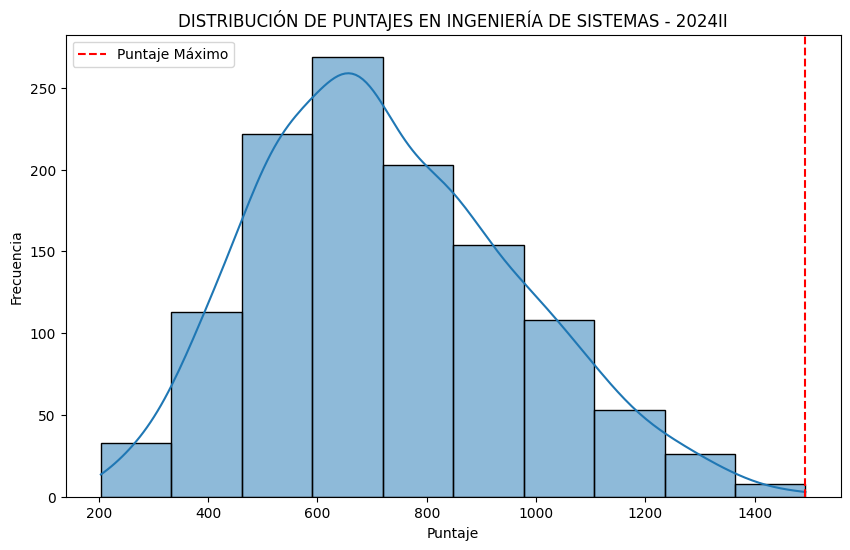

EL PUNTAJE MÁXIMO PARA INGENIERÍA DE SISTEMAS ES 1493.0 Y EL PUNTAJE MINIMO ES 1197.25 EN EL PERIODO 2024II


In [25]:
hist_career('INGENIERÍA DE SISTEMAS', '2024II')  # Reemplaza con la carrera que deseas analizar

Qué carrera tiene el puntaje más alto y quién es el estudiante asociado?
Identifica al estudiante con el puntaje más alto y la carrera correspondiente.

In [26]:
highest_score = resultados_exam.loc[resultados_exam.groupby('periodo')['score'].idxmax()]
highest_score[['full_name','career_1','score', 'periodo']]

,full_name,career_1,score,periodo
7442,"ROJAS BENITES, CAMILA JIMENA",DERECHO,1556.375,2023II
43854,"SALAZAR SEDANO, JOAQUÍN SEBASTIÁN",COMPUTACIÓN CIENTÍFICA,1704.250,2024I
64882,"FUSTAMANTE CUEVA, ISIS MICHELLE",ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,1563.125,2024II
77677,"TICLLASUCA ACLARI, JOSEPH CARLOS",DERECHO,1717.370,2025I


¿Cuántos estudiantes lograron alcanzar un puesto vacante en comparación con los que no lo hicieron?
Compara el número de estudiantes que tienen una observación de "ALCANZO VACANTE" frente a aquellos sin esta observación.


In [27]:
resultados_exam['observation'].unique()

array(['NO ALCANZO VACANTE', 'ALCANZO VACANTE PRIMERA OPCION', 'AUSENTE',
       'ALCANZO VACANTE SEGUNDA OPCIÓN', 'ANULADO'], dtype=object)

In [28]:
vacant_reached = resultados_exam[
    (resultados_exam['observation'] == 'ALCANZO VACANTE PRIMERA OPCION') | (resultados_exam['observation'] == 'ALCANZO VACANTE SEGUNDA OPCIÓN') | (resultados_exam['observation'] == 'NO ALCANZO VACANTE')
]

In [29]:
vacant_reached['observation'].unique()

array(['NO ALCANZO VACANTE', 'ALCANZO VACANTE PRIMERA OPCION',
       'ALCANZO VACANTE SEGUNDA OPCIÓN'], dtype=object)

In [30]:
comparison = vacant_reached.groupby(['periodo','observation'])['observation'].count().reset_index(name = 'count')
comparison

,periodo,observation,count
0,2023II,ALCANZO VACANTE PRIMERA OPCION,3751
1,2023II,NO ALCANZO VACANTE,20348
2,2024I,ALCANZO VACANTE PRIMERA OPCION,1821
3,2024I,ALCANZO VACANTE SEGUNDA OPCIÓN,303
4,2024I,NO ALCANZO VACANTE,26403
5,2024II,ALCANZO VACANTE PRIMERA OPCION,2118
6,2024II,ALCANZO VACANTE SEGUNDA OPCIÓN,512
7,2024II,NO ALCANZO VACANTE,19238
8,2025I,ALCANZO VACANTE PRIMERA OPCION,2136
9,2025I,NO ALCANZO VACANTE,16332


In [31]:
# Pivotar el DataFrame para tener 'observation' como columnas
pivot_comparison = comparison.pivot(index='periodo', columns='observation', values='count').fillna(0)
pivot_comparison

observation,ALCANZO VACANTE PRIMERA OPCION,ALCANZO VACANTE SEGUNDA OPCIÓN,NO ALCANZO VACANTE
periodo,,,
2023II,3751.0,0.0,20348.0
2024I,1821.0,303.0,26403.0
2024II,2118.0,512.0,19238.0
2025I,2136.0,0.0,16332.0


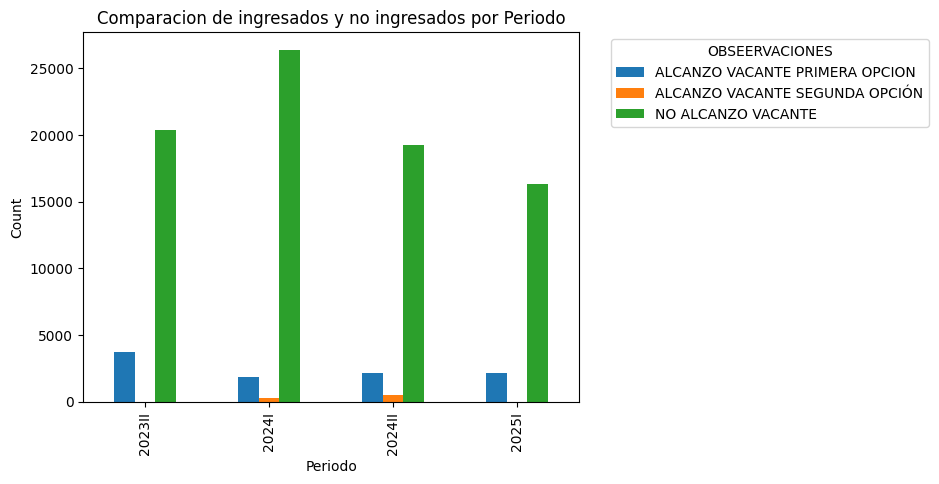

In [32]:
# Crear el gráfico de barras apilado
pivot_comparison.plot(kind = 'bar')
# Configurar etiquetas y título
plt.title('Comparacion de ingresados y no ingresados por Periodo')
plt.xlabel('Periodo')
plt.ylabel('Count')
plt.legend(title='OBSEERVACIONES', bbox_to_anchor=(1.05, 1), loc='upper left')

¿Cuál es el maximo de puntaje por carrera?
Calcula el promedio de puntaje para cada carrera para ver cómo se comparan entre sí.

In [33]:
def mean_score(periodo):

    #filtramos por periodo
    periodo_filter = resultados_exam[resultados_exam['periodo'] == periodo]

    #agrupamos por carrera y mostramos el promedio
    max_score = periodo_filter.groupby('career_1')['score'].max().sort_values(ascending = False).reset_index()
    top10 = max_score.nlargest(20, 'score')
    #creamos un grafico de lineas
    plt.figure(figsize = (10,6))
    sns.lineplot(x = 'career_1', y = 'score', data=top10)
    plt.xlabel('Carrera')
    plt.ylabel('Puntaje maximo')
    plt.title(f'Puntaje maximo por carrera en el periodo {periodo}')
    plt.xticks(rotation = 90)
   


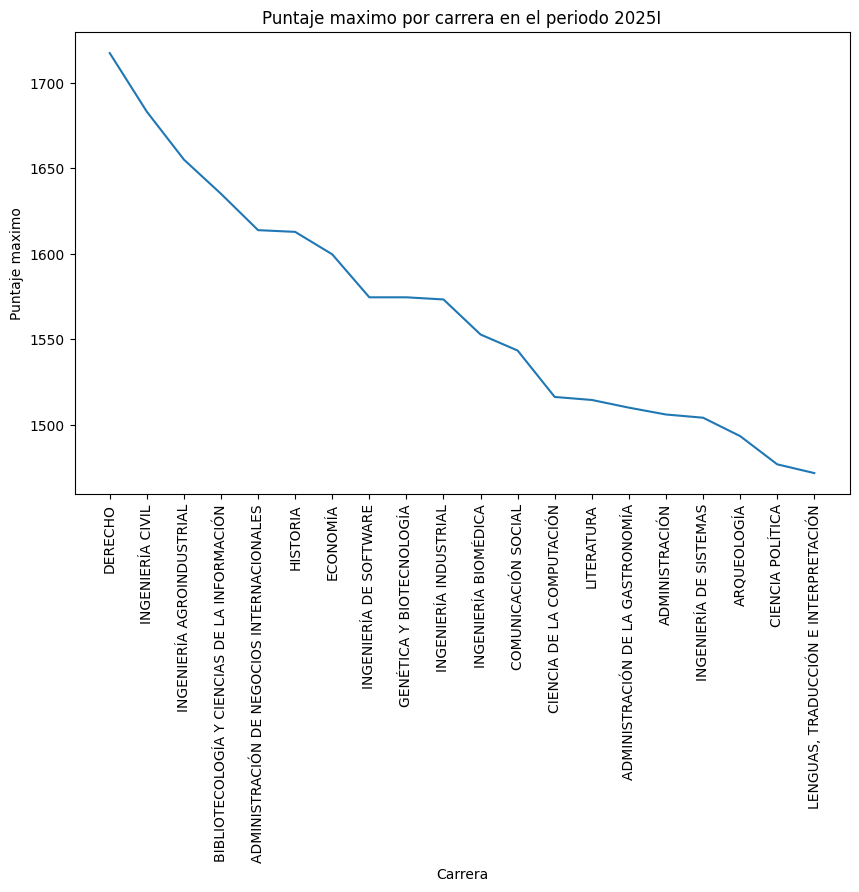

In [34]:
mean_score("2025I")

¿Hay alguna correlación entre el puntaje y el orden de mérito?
Investiga si existe alguna relación entre las puntuaciones y el orden de mérito, aunque algunos valores sean NaN.


In [35]:
df_numerico = resultados_exam.select_dtypes(include = 'number')

In [36]:
correlation = df_numerico.corr()
correlation

,score,merit_order
score,1.000000,-0.217487
merit_order,-0.217487,1.000000


<Axes: >

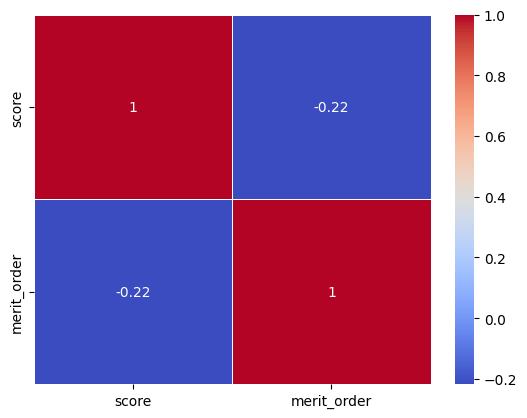

In [37]:
sns.heatmap(correlation, annot = True, cmap = 'coolwarm', linewidths=0.5)

En primera instancia se puede observar que existe una ligera correlacion negativa entre ambas variables. Se podrá observar mejor con un grafico de regresion

<Axes: xlabel='merit_order', ylabel='score'>

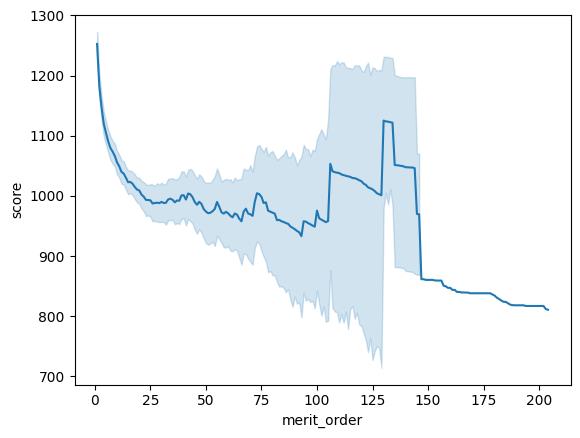

In [38]:
sns.lineplot(x= 'merit_order', y = 'score', data = resultados_exam)

Aqui se puede apreciar una tendencia negativa, ya que los orden de meritos mas cercanos al 0 tienden a tener puntajes mas altos a los que mas alejados. Lo cual es algo obvio, ya que los primeros puestos tienden a tener los puntajes mas altos para que puedan alcanzar una vacante.

¿Qué porcentaje de estudiantes por encima de 900 alcanzaron vacante?
Determina cuántos estudiantes con un puntaje superior a 900 alcanzaron una vacante

In [39]:
def score_900(periodo):
    score_period = resultados_exam[(resultados_exam['periodo'] == periodo) & (resultados_exam['score'] >= 900)] #filtramos por periodo y por puntajes mayores o iguales 900

    proportion = score_period.groupby('observation')['observation'].count().reset_index(name = 'count')  #agrupamos por observacion para contar cuantos postulantes alcanzaron vacantes
    proportion['proportion'] = proportion['count'] / proportion['count'].sum() * 100 # mostramos el porcentaje
    
    labels = proportion['observation'] #denominamos las etiquetas
    plt.pie(proportion['proportion'], labels=labels, autopct= '%1.1f%%') #mostramos los porcentajes en un grafico de pie
    plt.title(f"PROPORCION DE LOS POSTULANTES CON PUNTAJE MAYOR A 900 PUNTOS DEL {periodo}")


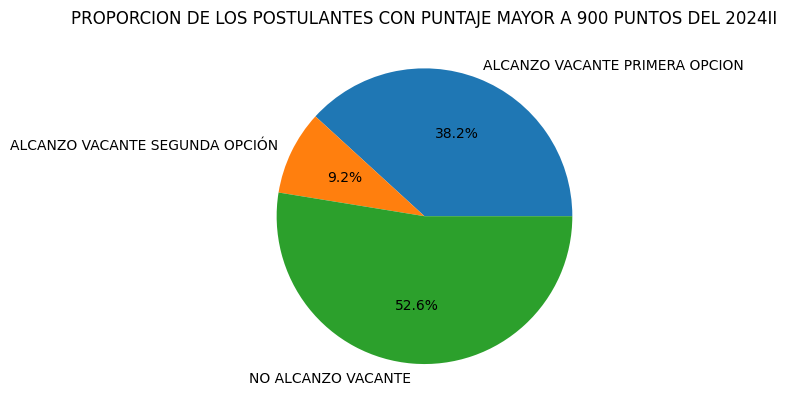

In [40]:
score_900('2024II')

¿Cuál es el período con la mayor cantidad de estudiantes y cuál tiene los puntajes más altos?
Analiza la cantidad de estudiantes en cada período y su rendimiento promedio.

In [41]:
period_high = resultados_exam.groupby('periodo').agg({'full_name':'nunique', 'score':'max'}).reset_index()
period_high

,periodo,full_name,score
0,2023II,24553,1556.375
1,2024I,28862,1704.250
2,2024II,22077,1563.125
3,2025I,18650,1717.370


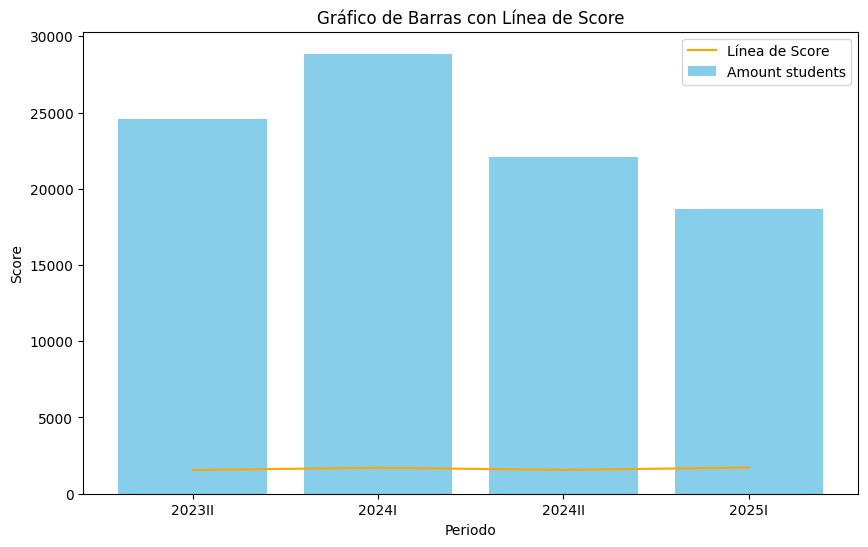

In [42]:
plt.figure(figsize=(10, 6))
x = range(len(period_high['periodo']))

# Graficar las barras
plt.bar(x, period_high['full_name'], label='Amount students', color='skyblue')

# Graficar la línea de score
plt.plot(x, period_high['score'], color='orange', label='Línea de Score')

# Configuración del gráfico
plt.xticks(x, period_high['periodo'])
plt.xlabel('Periodo')
plt.ylabel('Score')
plt.title('Gráfico de Barras con Línea de Score')
plt.legend()


# Mostrar el gráfico
plt.show()

¿Existen diferencias notables en puntajes entre las diferentes cohortes de carreras (2023II vs. 2024I vs. 2024II)?
Compara los puntajes de las carreras en las diferentes cohortes.

In [43]:
def cohort_career(career):
    career_filtered = resultados_exam[(resultados_exam['career_1'] == career) & (resultados_exam['observation'] == 'ALCANZO VACANTE PRIMERA OPCION')]

    if not career_filtered.empty:
         cohort_students = career_filtered.pivot_table(index = 'career_1', columns='periodo', values='score', aggfunc='max')
         print(cohort_students)
         sns.heatmap(cohort_students, annot=True, fmt=".2f")
         plt.xlabel('Periodo')
         plt.ylabel('')
         plt.show()
    else:
        print('No se encontraron datos para la carrera seleccionada')


periodo                                       2023II     2024I    2024II  \
career_1                                                                   
ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES  1331.875  1556.375  1563.125   

periodo                                        2025I  
career_1                                              
ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES  1613.875  


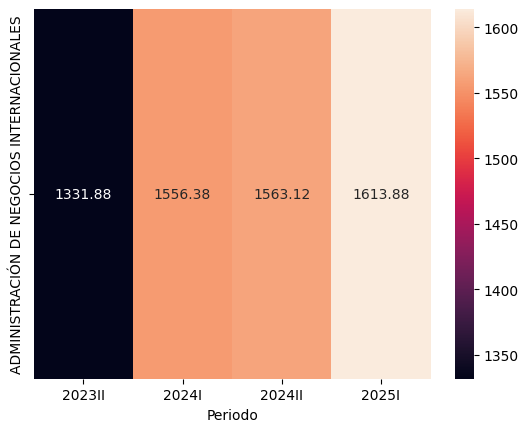

In [44]:
cohort_career('ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES')


¿Qué carreras tienen más estudiantes sin puntaje registrado?
Identifica qué carreras tienen más estudiantes con puntajes NaN.


In [45]:
#filtramos el dataframe con los postulantes que no ingresaron
sin_vacante = resultados_exam[(resultados_exam['observation'] == 'NO ALCANZO VACANTE')]
sin_vacante

,student_id,full_name,career_1,score,merit_order,observation,periodo,career_2,location
0,855168,"ABAD GRANDA, ANDRE FAHET",MEDICINA HUMANA,774.750,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
1,860373,"ABAD NEYRA, ANDREA TAIS",MEDICINA HUMANA,299.000,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
2,894207,"ABAD ONCOY, MARIA BELÉN",MEDICINA HUMANA,441.750,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
3,875677,"ABAL PRINCIPE, INGRID",MEDICINA HUMANA,530.500,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
4,855333,"ABANTO ARAUJO, PERCY ANGEL",MEDICINA HUMANA,584.625,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
...,...,...,...,...,...,...,...,...,...
94137,227692,"YOLA MUCHCCO, JAIR SEBASTIAN",CIENCIA DE LA COMPUTACIÓN,1009.375,NaN,NO ALCANZO VACANTE,2025I,NaN,LIMA
94138,224825,"YUPANQUI CARPIO, DIEGO ANDRE",CIENCIA DE LA COMPUTACIÓN,1101.875,NaN,NO ALCANZO VACANTE,2025I,NaN,LIMA
94139,306406,"YUPANQUI TICLLACURI, ANDY",CIENCIA DE LA COMPUTACIÓN,1119.375,NaN,NO ALCANZO VACANTE,2025I,NaN,LIMA
94140,298747,"ZAPATA MOREYRA, ALEXIS EDUARDO",CIENCIA DE LA COMPUTACIÓN,790.125,NaN,NO ALCANZO VACANTE,2025I,NaN,LIMA


In [46]:
observation = sin_vacante.pivot_table(index='observation', columns='periodo', values='student_id', aggfunc='count').sort_values(by = 'observation',ascending=False).reset_index()
observation

periodo,observation,2023II,2024I,2024II,2025I
0,NO ALCANZO VACANTE,20348,26403,19238,16332


In [47]:
# Convertir a formato largo con melt
df_melt = observation.melt(id_vars='observation', var_name='periodo', value_name='cantidad')
df_melt

,observation,periodo,cantidad
0,NO ALCANZO VACANTE,2023II,20348
1,NO ALCANZO VACANTE,2024I,26403
2,NO ALCANZO VACANTE,2024II,19238
3,NO ALCANZO VACANTE,2025I,16332


Text(0.5, 1.0, 'CANTIDAD DE POSTULANTES QUE NO ALCANZARON VACANTES POR PERIODO')

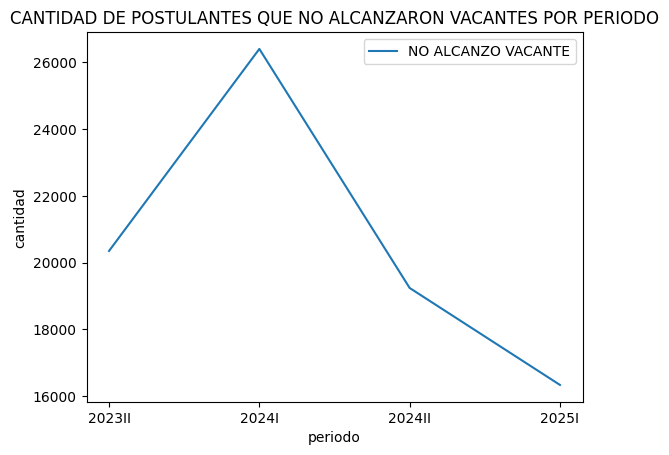

In [48]:
labels = ['NO ALCANZO VACANTE']
sns.lineplot(x='periodo', y='cantidad', data=df_melt)
plt.legend(labels=labels)
plt.title('CANTIDAD DE POSTULANTES QUE NO ALCANZARON VACANTES POR PERIODO')

In [49]:
def wo_vacant(career):
    
    sin_vacante_filtered = sin_vacante[sin_vacante['career_1'] == career]

    if not sin_vacante_filtered.empty:
     wo_lineplot = sin_vacante_filtered.pivot_table(index = 'career_1', columns='periodo', values='student_id', aggfunc='count').reset_index()

     career_wo_vacant_melt = wo_lineplot.melt(id_vars= 'career_1', var_name='periodo', value_name='cantidad')
     sns.lineplot(x='periodo', y='cantidad', data=career_wo_vacant_melt, marker = 'o')
     plt.title(f'CANTIDAD DE POSTULANTES QUE NO ALCANZARON VACANTE DE {career}')
     for i in range(career_wo_vacant_melt.shape[0]):
        plt.text(career_wo_vacant_melt['periodo'][i], career_wo_vacant_melt['cantidad'][i], str(career_wo_vacant_melt['cantidad'][i]), 
             ha='center', va='bottom')

    else:
        print(f'No se encontraron datos para la carrera de {career}')
    
    return career_wo_vacant_melt


,career_1,periodo,cantidad
0,INGENIERÍA DE SOFTWARE,2023II,624
1,INGENIERÍA DE SOFTWARE,2024I,794
2,INGENIERÍA DE SOFTWARE,2024II,536
3,INGENIERÍA DE SOFTWARE,2025I,550


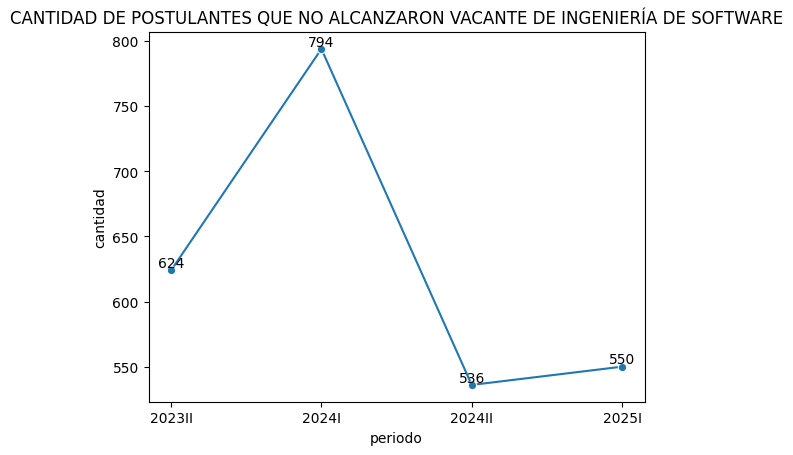

In [50]:
wo_vacant('INGENIERÍA DE SOFTWARE')

In [51]:
resultados_exam.head()

,student_id,full_name,career_1,score,merit_order,observation,periodo,career_2,location
0,855168,"ABAD GRANDA, ANDRE FAHET",MEDICINA HUMANA,774.750,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
1,860373,"ABAD NEYRA, ANDREA TAIS",MEDICINA HUMANA,299.000,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
2,894207,"ABAD ONCOY, MARIA BELÉN",MEDICINA HUMANA,441.750,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
3,875677,"ABAL PRINCIPE, INGRID",MEDICINA HUMANA,530.500,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA
4,855333,"ABANTO ARAUJO, PERCY ANGEL",MEDICINA HUMANA,584.625,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA


In [52]:
resultados_exam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94142 entries, 0 to 94141
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   94142 non-null  object 
 1   full_name    94142 non-null  object 
 2   career_1     94142 non-null  object 
 3   score        92962 non-null  float64
 4   merit_order  10641 non-null  float64
 5   observation  94142 non-null  object 
 6   periodo      94142 non-null  object 
 7   career_2     815 non-null    object 
 8   location     94142 non-null  object 
dtypes: float64(2), object(7)
memory usage: 6.5+ MB


In [53]:
areas_examen = [
    {'area_code': 'A', 'career_1': 'MEDICINA HUMANA'},
    {'area_code': 'A', 'career_1': 'OBSTETRICIA'},
    {'area_code': 'A', 'career_1': 'ENFERMERÍA'},
    {'area_code': 'A', 'career_1': 'TECNOLOGÍA MÉDICA'},
    {'area_code': 'A', 'career_1': 'LABORATORIO CLÍNICO Y ANATOMÍA PATOLÓGICA'},
    {'area_code': 'A', 'career_1': 'TERAPIA FÍSICA Y REHABILITACIÓN'},
    {'area_code': 'A', 'career_1': 'RADIOLOGÍA'},
    {'area_code': 'A', 'career_1': 'TERAPIA OCUPACIONAL'},
    {'area_code': 'A', 'career_1': 'NUTRICIÓN'},
    {'area_code': 'A', 'career_1': 'FARMACIA Y BIOQUÍMICA'},
    {'area_code': 'A', 'career_1': 'CIENCIAS DE LOS ALIMENTOS'},
    {'area_code': 'A', 'career_1': 'TOXICOLOGÍA'},
    {'area_code': 'A', 'career_1': 'ODONTOLOGÍA'},
    {'area_code': 'A', 'career_1': 'MEDICINA VETERINARIA'},
    {'area_code': 'A', 'career_1': 'PSICOLOGÍA'},
    {'area_code': 'A', 'career_1': 'PSICOLOGÍA ORGANIZACIONAL Y DE LA GESTIÓN HUMANA'},
    {'area_code': 'B', 'career_1': 'QUÍMICA'},
    {'area_code': 'B', 'career_1': 'CIENCIAS BIOLÓGICAS'},
    {'area_code': 'B', 'career_1': 'GENÉTICA Y BIOTECNOLOGÍA'},
    {'area_code': 'B', 'career_1': 'MICROBIOLOGÍA Y PARASITOLOGÍA'},
    {'area_code': 'B', 'career_1': 'FÍSICA'},
    {'area_code': 'B', 'career_1': 'MATEMÁTICA'},
    {'area_code': 'B', 'career_1': 'ESTADÍSTICA'},
    {'area_code': 'B', 'career_1': 'INVESTIGACIÓN OPERATIVA'},
    {'area_code': 'B', 'career_1': 'COMPUTACIÓN CIENTÍFICA'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA QUÍMICA'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA AGROINDUSTRIAL'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA MECÁNICA DE FLUIDOS'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA GEOLÓGICA'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA GEOGRÁFICA'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA DE MINAS'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA METALÚRGICA'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA CIVIL'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA AMBIENTAL'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA INDUSTRIAL'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA TEXTIL Y CONFECCIONES'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA DE SEGURIDAD Y SALUD EN EL TRABAJO'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA ELECTRÓNICA'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA ELÉCTRICA'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA DE TELECOMUNICACIONES'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA DE SISTEMAS'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA DE SOFTWARE'},
    {'area_code': 'E', 'career_1': 'DERECHO'},
    {'area_code': 'E', 'career_1': 'CIENCIA POLÍTICA'},
    {'area_code': 'E', 'career_1': 'LITERATURA'},
    {'area_code': 'E', 'career_1': 'FILOSOFÍA'},
    {'area_code': 'E', 'career_1': 'LINGÜÍSTICA'},
    {'area_code': 'E', 'career_1': 'COMUNICACIÓN SOCIAL'},
    {'area_code': 'E', 'career_1': 'ARTE'},
    {'area_code': 'E', 'career_1': 'BIBLIOTECOLOGÍA Y CIENCIAS DE LA INFORMACIÓN'},
    {'area_code': 'E', 'career_1': 'DANZA'},
    {'area_code': 'E', 'career_1': 'CONSERVACIÓN Y RESTAURACIÓN'},
    {'area_code': 'E', 'career_1': 'EDUCACIÓN'},
    {'area_code': 'E', 'career_1': 'EDUCACIÓN INICIAL'},
    {'area_code': 'E', 'career_1': 'EDUCACIÓN PRIMARIA'},
    {'area_code': 'E', 'career_1': 'EDUCACIÓN SECUNDARIA'},
    {'area_code': 'E', 'career_1': 'EDUCACIÓN FÍSICA'},
    {'area_code': 'E', 'career_1': 'HISTORIA'},
    {'area_code': 'E', 'career_1': 'SOCIOLOGÍA'},
    {'area_code': 'E', 'career_1': 'ANTROPOLOGÍA'},
    {'area_code': 'E', 'career_1': 'ARQUEOLOGÍA'},
    {'area_code': 'E', 'career_1': 'TRABAJO SOCIAL'},
    {'area_code': 'E', 'career_1': 'GEOGRAFÍA'},
    {'area_code': 'D', 'career_1': 'ADMINISTRACIÓN'},
    {'area_code': 'D', 'career_1': 'ADMINISTRACIÓN DE TURISMO'},
    {'area_code': 'D', 'career_1': 'ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES'},
    {'area_code': 'D', 'career_1': 'CONTABILIDAD'},
    {'area_code': 'D', 'career_1': 'GESTIÓN TRIBUTARIA'},
    {'area_code': 'D', 'career_1': 'AUDITORÍA EMPRESARIAL Y DEL SECTOR PÚBLICO'},
    {'area_code': 'D', 'career_1': 'ECONOMÍA'},
    {'area_code': 'D', 'career_1': 'ECONOMÍA PÚBLICA'},
    {'area_code': 'D', 'career_1': 'ECONOMÍA INTERNACIONAL'},
    {'area_code': 'A', 'career_1': 'TEC. MED. LAB. CLÍNICO Y ANATOMÍA PATOLÓGICA'},
    {'area_code': 'A', 'career_1': 'TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN'},
    {'area_code': 'A', 'career_1': 'TEC. MED. RADIOLOGÍA'},
    {'area_code': 'A', 'career_1': 'TEC. MED. TERAPIA OCUPACIONAL'},
    {'area_code': 'A', 'career_1': 'NUTRICION'},
    {'area_code': 'E', 'career_1': 'LINGUÍSTICA'},
    {'area_code': 'D', 'career_1': 'PRESUPUESTO Y FINANZAS PÚBLICAS'},
    {'area_code': 'C', 'career_1': 'INGENIERÍA BIOMÉDICA'},
    {'area_code': 'B', 'career_1': 'CIENCIA DE LA COMPUTACIÓN'},
    {'area_code': 'E', 'career_1': 'LENGUAS, TRADUCCIÓN E INTERPRETACIÓN'},
    {'area_code': 'D', 'career_1': 'ADMINISTRACIÓN DE LA GASTRONOMÍA'},
    {'area_code': 'D', 'career_1': 'ADMINISTRACIÓN MARÍTIMA Y PORTUARIA'},
    {'area_code': 'D', 'career_1': 'MARKETING'},
    {'area_code':'C', 'career_1':'ARQUITECTURA Y URBANISMO'}

]

df_areas = pd.DataFrame(areas_examen)
# df_areas.to_csv('areas_sanmarcos', index = False)

In [54]:
uniques = df_areas['career_1'].unique()
uniques

array(['MEDICINA HUMANA', 'OBSTETRICIA', 'ENFERMERÍA',
       'TECNOLOGÍA MÉDICA', 'LABORATORIO CLÍNICO Y ANATOMÍA PATOLÓGICA',
       'TERAPIA FÍSICA Y REHABILITACIÓN', 'RADIOLOGÍA',
       'TERAPIA OCUPACIONAL', 'NUTRICIÓN', 'FARMACIA Y BIOQUÍMICA',
       'CIENCIAS DE LOS ALIMENTOS', 'TOXICOLOGÍA', 'ODONTOLOGÍA',
       'MEDICINA VETERINARIA', 'PSICOLOGÍA',
       'PSICOLOGÍA ORGANIZACIONAL Y DE LA GESTIÓN HUMANA', 'QUÍMICA',
       'CIENCIAS BIOLÓGICAS', 'GENÉTICA Y BIOTECNOLOGÍA',
       'MICROBIOLOGÍA Y PARASITOLOGÍA', 'FÍSICA', 'MATEMÁTICA',
       'ESTADÍSTICA', 'INVESTIGACIÓN OPERATIVA', 'COMPUTACIÓN CIENTÍFICA',
       'INGENIERÍA QUÍMICA', 'INGENIERÍA AGROINDUSTRIAL',
       'INGENIERÍA MECÁNICA DE FLUIDOS', 'INGENIERÍA GEOLÓGICA',
       'INGENIERÍA GEOGRÁFICA', 'INGENIERÍA DE MINAS',
       'INGENIERÍA METALÚRGICA', 'INGENIERÍA CIVIL',
       'INGENIERÍA AMBIENTAL', 'INGENIERÍA INDUSTRIAL',
       'INGENIERÍA TEXTIL Y CONFECCIONES',
       'INGENIERÍA DE SEGURIDAD Y SALUD 

In [55]:
#separamos las ciudades de las carreras para un mejor analisis
#resultados_exam['location_2'] = resultados_exam['career_2'].str.extract(r' - (.+)')  # Extraer 'LIMA'
#resultados_exam['career_2'] = resultados_exam['career_2'].str.replace(r' - .+', '', regex=True)  # Remover '- LIMA' de 'career_1'

In [56]:
def segunda_carrera(carrera, periodo):
    
    segunda_opcion = resultados_exam[(resultados_exam['career_1'] == carrera) & (resultados_exam['periodo'] == periodo) & (resultados_exam['observation'] == 'ALCANZO VACANTE SEGUNDA OPCIÓN') ]  

    if not segunda_opcion.empty:
     heat_segundaopcion = segunda_opcion.pivot_table(index='career_2', columns='career_1', values = 'student_id', aggfunc='count').reset_index().sort_values(by = carrera, ascending = False)
     heat_segundaopcion

     plt.figure(figsize=(10,6))
     sns.barplot(x = 'career_2', y = carrera, data=heat_segundaopcion )
     plt.xticks(rotation = 90)
     plt.title(f'CANTIDAD DE ALUMNOS QUE ESCOGEN OTRA CARRERA COMO SEGUNDA OPCION DE LA CARRERA DE {carrera}')

    else:
        print(f'No se encontraron datos para la carrera de {carrera}')
    
    return heat_segundaopcion


career_1,career_2,MEDICINA HUMANA
5,TEC. MED. RADIOLOGÍA,16
1,OBSTETRICIA,15
7,TEC. MED. TERAPIA OCUPACIONAL,10
6,TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN,9
8,TOXICOLOGÍA,8
0,CIENCIAS DE LOS ALIMENTOS,6
3,PSICOLOGÍA - HUARMEY,2
4,PSICOLOGÍA - VILLA RICA,1
2,PSICOLOGÍA - CHILCA,1


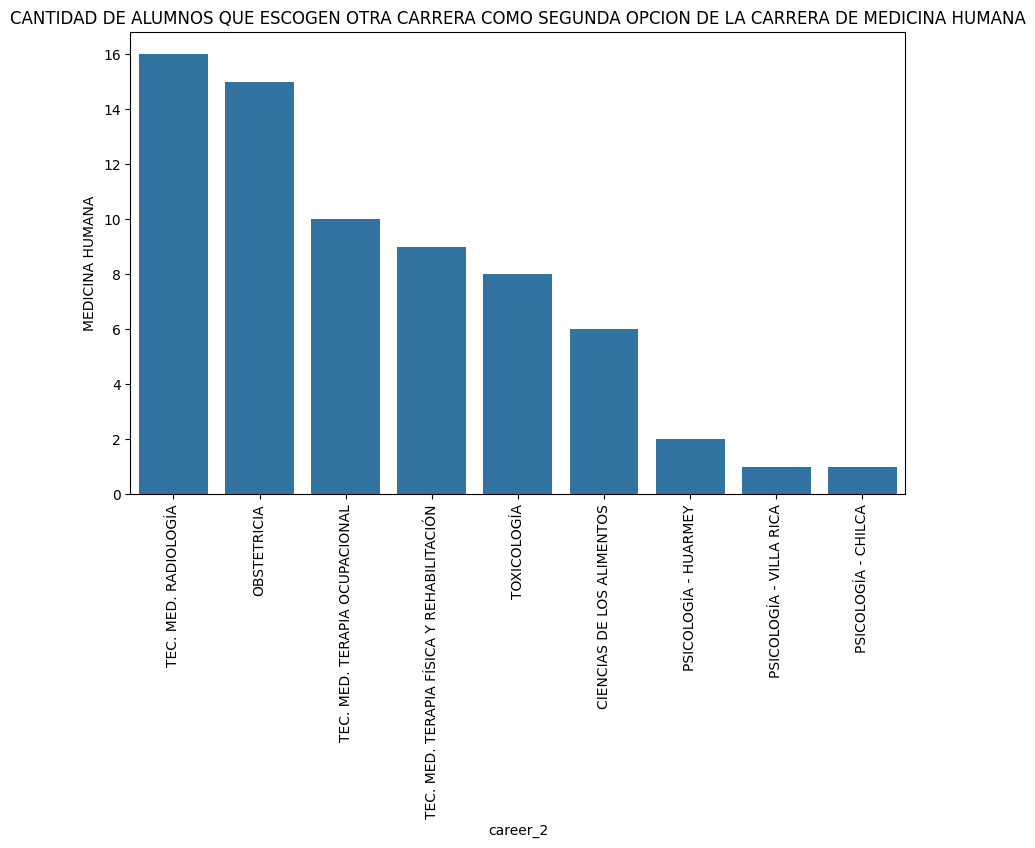

In [57]:
segunda_carrera('MEDICINA HUMANA', '2024II')

In [58]:
segunda_opcion = resultados_exam[(resultados_exam['observation'] == 'ALCANZO VACANTE SEGUNDA OPCIÓN') ] 


second_choice = segunda_opcion.pivot_table(index='career_2', columns='career_1', values = 'student_id', aggfunc='count').fillna(0).reset_index()
second_choice.head()

career_1,career_2,ADMINISTRACIÓN,ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,ADMINISTRACIÓN MARÍTIMA Y PORTUARIA,CIENCIA POLÍTICA,CIENCIAS DE LA COMPUTACIÓN,COMUNICACIÓN SOCIAL,CONTABILIDAD,DERECHO,ECONOMÍA,...,INGENIERÍA ELECTRÓNICA,INGENIERÍA GEOLÓGICA,INGENIERÍA INDUSTRIAL,"LENGUAS, TRADUCCIÓN E INTERPRETACIÓN",LITERATURA,MARKETING,MEDICINA HUMANA,MEDICINA VETERINARIA,ODONTOLOGÍA,PSICOLOGÍA
0,ADMINISTRACIÓN - HUARAL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ADMINISTRACIÓN - S.J.L,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ADMINISTRACIÓN DE LA GASTRONOMÍA,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ADMINISTRACIÓN DE TURISMO - LIMA,4.0,18.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,ADMINISTRACIÓN DE TURISMO - S.J.L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
resultados_exam.columns

Index(['student_id', 'full_name', 'career_1', 'score', 'merit_order',
       'observation', 'periodo', 'career_2', 'location'],
      dtype='object')

In [60]:
df_merge = resultados_exam.merge(df_areas, on='career_1', how = 'outer')
df_merge.sample(5)

,student_id,full_name,career_1,score,merit_order,observation,periodo,career_2,location,area_code
54450,239899,"HUARACA CHÁVEZ, DIEGO ENRIQUE",INGENIERÍA DE SOFTWARE,521.250,NaN,NO ALCANZO VACANTE,2024I,NaN,LIMA,C
32768,770030,"DIAZ ESCATE, OMAR JOSUÉ",EDUCACIÓN FÍSICA,960.504,14.0,ALCANZO VACANTE PRIMERA OPCION,2024I,NaN,LIMA,E
10881,709301,"QUINTANILLA AYÃAYANQUI, RAFAEL JESUS",CIENCIA POLÍTICA,1007.125,NaN,NO ALCANZO VACANTE,2024II,NaN,LIMA,E
4685,556589,"HUAHUALUQUE VILCA, MARY CARMEN",ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,484.000,NaN,NO ALCANZO VACANTE,2024I,NaN,LIMA,D
39873,778536,"BENAVENTE ROJAS, DANNA ANDREA CRISTINA",HISTORIA,513.000,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA,E


In [61]:
area_periodo_filtered = resultados_exam[resultados_exam['periodo'] == '2023I']

In [62]:
#mostramos un dataframe con el numero de postulantes y numero de ingresantes

competencia = df_merge.pivot_table(index='area_code', columns='observation', values ='student_id', aggfunc='count').fillna(0).reset_index()
competencia['total_estudiantes'] = competencia['ALCANZO VACANTE PRIMERA OPCION'] + competencia['ALCANZO VACANTE SEGUNDA OPCIÓN'] + competencia['ANULADO'] + competencia['AUSENTE'] + competencia['NO ALCANZO VACANTE']

In [63]:
competencia = competencia[
    ['area_code','ALCANZO VACANTE PRIMERA OPCION', 'ALCANZO VACANTE SEGUNDA OPCIÓN', 'total_estudiantes']
].dropna(axis = 1)

In [64]:
competencia

observation,area_code,ALCANZO VACANTE PRIMERA OPCION,ALCANZO VACANTE SEGUNDA OPCIÓN,total_estudiantes
0,A,1266.0,138.0,26277.0
1,B,889.0,17.0,3194.0
2,C,2185.0,227.0,26675.0
3,D,2923.0,223.0,17858.0
4,E,2535.0,209.0,19975.0


<Axes: xlabel='periodo', ylabel='full_name'>

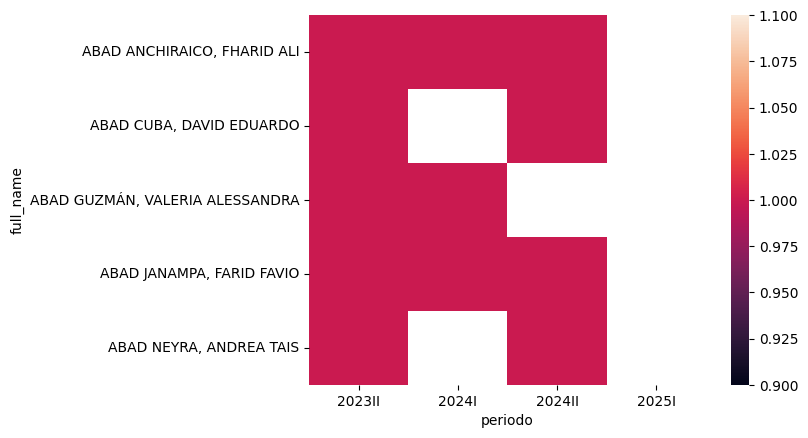

In [65]:
#cantidad de estudiantes por location y puntajes

score_location = resultados_exam.pivot_table(index='full_name', columns='periodo', values = 'student_id', aggfunc='count').fillna(0)
score_location['total_intentos'] = score_location['2023II'] + score_location['2024I'] + score_location['2024II']
score_location = score_location[score_location['total_intentos'] > 1]
score_location.sort_values(by = 'total_intentos', ascending=False)

mask = score_location.iloc[:,:-1].head() == 0

sns.heatmap(score_location.iloc[:, :-1].head(),
            linecolor='black',
            mask = mask)

In [66]:
score_location.head()

periodo,2023II,2024I,2024II,2025I,total_intentos
full_name,,,,,
"ABAD ANCHIRAICO, FHARID ALI",1.0,1.0,1.0,0.0,3.0
"ABAD CUBA, DAVID EDUARDO",1.0,0.0,1.0,0.0,2.0
"ABAD GUZMÁN, VALERIA ALESSANDRA",1.0,1.0,0.0,0.0,2.0
"ABAD JANAMPA, FARID FAVIO",1.0,1.0,1.0,0.0,3.0
"ABAD NEYRA, ANDREA TAIS",1.0,0.0,1.0,0.0,2.0


In [67]:
score_location_groupby = resultados_exam.groupby('location').agg({
    'score':'max',
    'student_id':'count'
}).fillna(0)

score_location_groupby

,score,student_id
location,,
CHILCA,889.250,29
HUARAL,1092.625,149
HUARMEY,774.750,5
LIMA,1717.370,93383
OYÓN,901.500,17
S.J.L,1298.875,498
VILLA RICA,1239.500,61


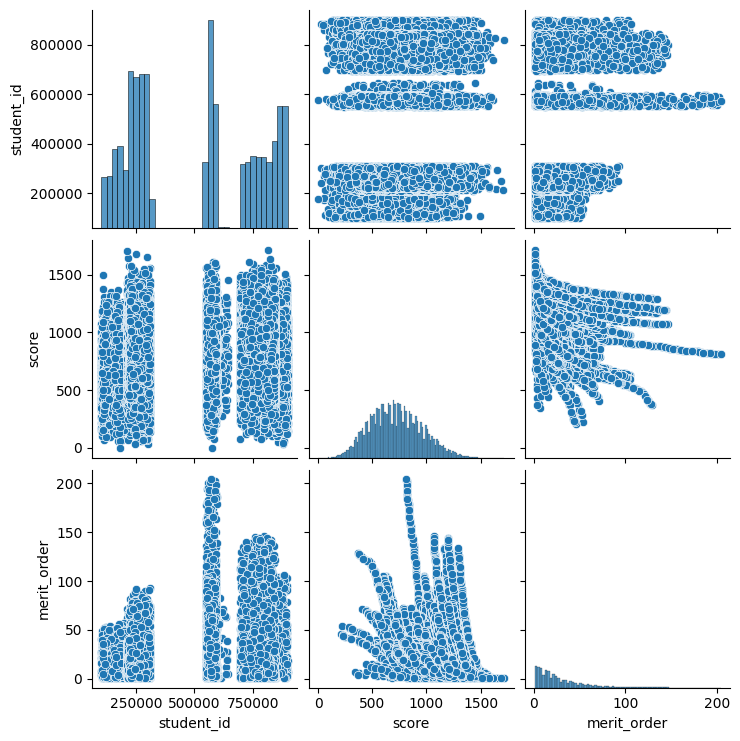

In [68]:
sns.pairplot(resultados_exam)

In [69]:
ingresados = resultados_exam.pivot_table(
    index = 'periodo', columns='observation', values = 'student_id', aggfunc='count'
).fillna(0)

In [70]:
ingresados['total_students'] = ingresados['ALCANZO VACANTE PRIMERA OPCION'] + ingresados['ALCANZO VACANTE SEGUNDA OPCIÓN'] + ingresados['ANULADO'] + ingresados['AUSENTE'] + ingresados['NO ALCANZO VACANTE']


In [71]:
ingresados['PORCENTAJE'] = ingresados['ALCANZO VACANTE PRIMERA OPCION'] / ingresados['total_students'] * 100

In [72]:
ingresados

observation,ALCANZO VACANTE PRIMERA OPCION,ALCANZO VACANTE SEGUNDA OPCIÓN,ANULADO,AUSENTE,NO ALCANZO VACANTE,total_students,PORCENTAJE
periodo,,,,,,,
2023II,3751.0,0.0,0.0,454.0,20348.0,24553.0,15.277156
2024I,1821.0,303.0,1.0,334.0,26403.0,28862.0,6.309334
2024II,2118.0,512.0,0.0,209.0,19238.0,22077.0,9.593695
2025I,2136.0,0.0,0.0,182.0,16332.0,18650.0,11.453083


In [73]:
funnel_df = resultados_exam.groupby('observation').agg({
    'student_id': 'count'
}).sort_values(by = 'student_id', ascending = False).reset_index()

In [74]:
funnel_df

,observation,student_id
0,NO ALCANZO VACANTE,82321
1,ALCANZO VACANTE PRIMERA OPCION,9826
2,AUSENTE,1179
3,ALCANZO VACANTE SEGUNDA OPCIÓN,815
4,ANULADO,1


In [75]:
funnel = resultados_exam.pivot_table(
    index = 'career_1',
    columns= 'observation',
    values= 'student_id',
    aggfunc='count'
).fillna(0).reset_index()

funnel['total_studiantes'] = (
        funnel.get('ALCANZO VACANTE PRIMERA OPCION', 0) 
      + funnel.get('ALCANZO VACANTE SEGUNDA OPCION', 0)
      + funnel.get('ANULADO', 0)
      + funnel.get('AUSENTE', 0)
      + funnel.get('NO ALCANZO VACANTE', 0)
)

funnel.head()

observation,career_1,ALCANZO VACANTE PRIMERA OPCION,ALCANZO VACANTE SEGUNDA OPCIÓN,ANULADO,AUSENTE,NO ALCANZO VACANTE,total_studiantes
0,ADMINISTRACIÓN,422.0,33.0,0.0,30.0,2689.0,3141.0
1,ADMINISTRACIÓN DE LA GASTRONOMÍA,23.0,0.0,0.0,9.0,195.0,227.0
2,ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,267.0,60.0,0.0,44.0,3223.0,3534.0
3,ADMINISTRACIÓN DE TURISMO,230.0,0.0,0.0,2.0,558.0,790.0
4,ADMINISTRACIÓN MARÍTIMA Y PORTUARIA,31.0,2.0,0.0,2.0,247.0,280.0


In [76]:
resultados_exam.columns

Index(['student_id', 'full_name', 'career_1', 'score', 'merit_order',
       'observation', 'periodo', 'career_2', 'location'],
      dtype='object')

In [77]:
consolidad = pd.read_csv(r'C:\Users\Dussand\Desktop\proyectsDS\Python\Scrapping\data_scrap\resultados_consolidados.csv')
areas = pd.read_csv(r'C:\Users\Dussand\Desktop\proyectsDS\Python\Scrapping\data_scrap\areas_sanmarcos')


#cambiamos el nombre de las columnas a nombres mas tecnicos
columns = {
     'area_code':'CODIGO DE AREA',
     'career_1':'CARRERA (PRIMERA OPCION)'
}

areas.rename(columns=columns, inplace = True)

columns = {
     
    'CODIGO':'CODIGO DEL ESTUDIANTE',
    'APELLIDOS Y NOMBRES':'APELLIDOS Y NOMBRES',
    'ESCUELA PROFESIONAL':'CARRERA (PRIMERA OPCION)',
    'PUNTAJE FINAL':'PUNTAJE',
    'MERITOE.P':'PUESTO',
    'OBSERVACI&OacuteN':'OBSERVACION',
    'MERITOE.P ALCANZA VACANTE':'PUESTO_1',
    'ESCUELA SEGUNDA OPCIÓN':'CARRERA (SEGUNDA OPCION)',
    'ESCUELA PROFESIONAL (PRIMERA OPCIÓN)':'CARRERA (PRIMERA OPCION)_1',
    'PUNTAJE':'PUNTAJE_1',
    'ESCUELA PROFESIONAL (SEGUNDA OPCIÓN)':'CARRERA (SEGUNDA OPCION)_1'
}

consolidad.rename(columns=columns, inplace = True)

def unir_columnas(df, col1, col2):
    # Fusionar las dos columnas y asignar el resultado a la columna original
    df[col1] = df[col1].combine_first(df[col2])
    # Eliminar la columna duplicada
    df.drop(columns=[col2], inplace=True)
    return df


# Aplicar la función a las columnas duplicadas
consolidad = unir_columnas(consolidad, 'PUESTO', 'PUESTO_1')
consolidad = unir_columnas(consolidad, 'CARRERA (PRIMERA OPCION)', 'CARRERA (PRIMERA OPCION)_1')
consolidad = unir_columnas(consolidad, 'PUNTAJE', 'PUNTAJE_1')
consolidad = unir_columnas(consolidad, 'CARRERA (SEGUNDA OPCION)', 'CARRERA (SEGUNDA OPCION)_1')

#separamos las ciudades de las carreras para un mejor analisis
consolidad['location'] = consolidad['CARRERA (PRIMERA OPCION)'].str.extract(r' - (.+)')  # Extraer 'LIMA'
consolidad['CARRERA (PRIMERA OPCION)'] = consolidad['CARRERA (PRIMERA OPCION)'].str.replace(r' - .+', '', regex=True)  # Remover '- LIMA' de 'CARRERA (PRIMERA OPCION)'

#separamos las ciudades de las carreras para un mejor analisis
consolidad['location_2'] = consolidad['CARRERA (SEGUNDA OPCION)'].str.extract(r' - (.+)')  # Extraer 'LIMA'
consolidad['CARRERA (SEGUNDA OPCION)'] = consolidad['CARRERA (SEGUNDA OPCION)'].str.replace(r' - .+', '', regex=True)  # Remover '- LIMA' de 'CARRERA (PRIMERA OPCION)'

#corregimos los textos
consolidad['OBSERVACION'] = consolidad['OBSERVACION'].replace({
    'ALCANZO VACANTE SEGUNDA OPCIÃ\x93N':'ALCANZO VACANTE SEGUNDA OPCION',
    'ALCANZO VACANTE PRIMERA OPCIÃ\x93N':'ALCANZO VACANTE PRIMERA OPCION',
    'ALCANZO VACANTE':'ALCANZO VACANTE PRIMERA OPCION',
    'ALCANZO VACANTE SEGUNDA OPCIÓN':'ALCANZO VACANTE SEGUNDA OPCION'
})

#ARREGLAMOS LA CARRERA
consolidad['CARRERA (PRIMERA OPCION)'].replace('CIENCIA DE LA COMPUTACION', 'CIENCIAS DE LA COMPUNTACIÓN', inplace=True)

#rellenamos la columna de observacion con valores ausentes con "no alcanzó vacante"
consolidad['OBSERVACION'] = consolidad['OBSERVACION'].fillna('NO ALCANZO VACANTE')

#rellenamos la columna de location con valores ausentes con "LIMA"
consolidad['location'] = consolidad['location'].fillna('LIMA')
consolidad['location_2'] = consolidad['location_2'].fillna('LIMA')

#analizamos los tipos de datos y corregimos en base a las necesidades para el analisis
consolidad['CODIGO DEL ESTUDIANTE'] = consolidad['CODIGO DEL ESTUDIANTE'].astype(object)

#cruzamos los dataframes para que cada carrera tenga su area
consolidad = consolidad.merge(areas, on = 'CARRERA (PRIMERA OPCION)', how = 'left')

C:\Users\Dussand\AppData\Local\Temp\ipykernel_11784\150262349.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  consolidad = pd.read_csv(r'C:\Users\Dussand\Desktop\proyectsDS\Python\Scrapping\data_scrap\resultados_consolidados.csv')
C:\Users\Dussand\AppData\Local\Temp\ipykernel_11784\150262349.py:61: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  consolidad['CARRERA (PRIMERA OPCION)'].replace('CIENCIA DE LA COMPUTACION', 'CIENCIAS DE LA COMPUNTACIÓN', inplace=True)


In [78]:
consolidad.head()

,CODIGO DEL ESTUDIANTE,APELLIDOS Y NOMBRES,CARRERA (PRIMERA OPCION),PUNTAJE,PUESTO,OBSERVACION,periodo,CARRERA (SEGUNDA OPCION),location,location_2,CODIGO DE AREA
0,855168,"ABAD GRANDA, ANDRE FAHET",MEDICINA HUMANA,774.750,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA,LIMA,A
1,860373,"ABAD NEYRA, ANDREA TAIS",MEDICINA HUMANA,299.000,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA,LIMA,A
2,894207,"ABAD ONCOY, MARIA BELÉN",MEDICINA HUMANA,441.750,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA,LIMA,A
3,875677,"ABAL PRINCIPE, INGRID",MEDICINA HUMANA,530.500,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA,LIMA,A
4,855333,"ABANTO ARAUJO, PERCY ANGEL",MEDICINA HUMANA,584.625,NaN,NO ALCANZO VACANTE,2023II,NaN,LIMA,LIMA,A


In [79]:
consolidad.columns

Index(['CODIGO DEL ESTUDIANTE', 'APELLIDOS Y NOMBRES',
       'CARRERA (PRIMERA OPCION)', 'PUNTAJE', 'PUESTO', 'OBSERVACION',
       'periodo', 'CARRERA (SEGUNDA OPCION)', 'location', 'location_2',
       'CODIGO DE AREA'],
      dtype='object')

In [80]:
students_career = consolidad.pivot_table(
    index = 'CARRERA (PRIMERA OPCION)',
    columns= 'periodo',
    values = 'CODIGO DEL ESTUDIANTE',
    aggfunc= 'count'
)

students_career

periodo,2023II,2024I,2024II,2025I
CARRERA (PRIMERA OPCION),,,,
ADMINISTRACIÓN,818.0,960.0,695.0,701.0
ADMINISTRACIÓN DE LA GASTRONOMÍA,NaN,NaN,101.0,126.0
ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,874.0,1056.0,748.0,916.0
ADMINISTRACIÓN DE TURISMO,219.0,210.0,167.0,194.0
ADMINISTRACIÓN MARÍTIMA Y PORTUARIA,NaN,NaN,122.0,160.0
...,...,...,...,...
TEC. MED. RADIOLOGÍA,125.0,98.0,77.0,128.0
TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN,150.0,152.0,115.0,168.0
TEC. MED. TERAPIA OCUPACIONAL,82.0,63.0,37.0,97.0


In [81]:

ingresados_count = consolidad[consolidad['OBSERVACION'] == 'ALCANZO VACANTE PRIMERA OPCION'].pivot_table(
    index='CARRERA (PRIMERA OPCION)',
    columns='periodo',
    values='CODIGO DEL ESTUDIANTE',
    aggfunc='count'
).fillna(0).reset_index()

In [116]:
student_count = consolidad.pivot_table(
    index='CARRERA (PRIMERA OPCION)',
    columns='periodo',
    values='CODIGO DEL ESTUDIANTE',
    aggfunc='count'
).fillna(0).reset_index()


columns = {
    '2023II':'post_2023II',
    '2024I':'post_2024I',
    '2024II':'post_2024II',
    '2025I':'post_2025I',

}

student_count.rename(columns=columns, inplace=True)

student_count

periodo,CARRERA (PRIMERA OPCION),post_2023II,post_2024I,post_2024II,post_2025I
0,ADMINISTRACIÓN,818.0,960.0,695.0,701.0
1,ADMINISTRACIÓN DE LA GASTRONOMÍA,0.0,0.0,101.0,126.0
2,ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,874.0,1056.0,748.0,916.0
3,ADMINISTRACIÓN DE TURISMO,219.0,210.0,167.0,194.0
4,ADMINISTRACIÓN MARÍTIMA Y PORTUARIA,0.0,0.0,122.0,160.0
...,...,...,...,...,...
74,TEC. MED. RADIOLOGÍA,125.0,98.0,77.0,128.0
75,TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN,150.0,152.0,115.0,168.0
76,TEC. MED. TERAPIA OCUPACIONAL,82.0,63.0,37.0,97.0
77,TOXICOLOGÍA,51.0,39.0,23.0,62.0


In [118]:
df_numeric = student_count.merge(
    ingresados_count,
    on = 'CARRERA (PRIMERA OPCION)',
    how = 'inner'
)

columns = {
    '2023II':'ing_2023II',
    '2024I':'ing_2024I',
    '2024II':'ing_2024II',
    '2025I':'ing_2025I',

}

df_numeric.rename(columns=columns, inplace=True)
df_numeric

periodo,CARRERA (PRIMERA OPCION),post_2023II,post_2024I,post_2024II,post_2025I,ing_2023II,ing_2024I,ing_2024II,ing_2025I
0,ADMINISTRACIÓN,818.0,960.0,695.0,701.0,134.0,89.0,96.0,103.0
1,ADMINISTRACIÓN DE LA GASTRONOMÍA,0.0,0.0,101.0,126.0,0.0,0.0,15.0,8.0
2,ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,874.0,1056.0,748.0,916.0,85.0,57.0,61.0,64.0
3,ADMINISTRACIÓN DE TURISMO,219.0,210.0,167.0,194.0,91.0,36.0,47.0,56.0
4,ADMINISTRACIÓN MARÍTIMA Y PORTUARIA,0.0,0.0,122.0,160.0,0.0,0.0,23.0,8.0
...,...,...,...,...,...,...,...,...,...
74,TEC. MED. RADIOLOGÍA,125.0,98.0,77.0,128.0,25.0,10.0,5.0,17.0
75,TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN,150.0,152.0,115.0,168.0,25.0,9.0,12.0,17.0
76,TEC. MED. TERAPIA OCUPACIONAL,82.0,63.0,37.0,97.0,27.0,6.0,1.0,17.0
77,TOXICOLOGÍA,51.0,39.0,23.0,62.0,15.0,5.0,4.0,11.0


In [85]:
score_mean = consolidad.pivot_table(
    index='CARRERA (PRIMERA OPCION)',
    columns='periodo',
    values='PUNTAJE',
    aggfunc='mean'
).fillna(0).reset_index()

columns = {
    '2023II':'PROM_2023II',
    '2024I':'PROM_2024I',
    '2024II':'PROM_2024II',
    '2025I':'PROM_2025I',

}

score_mean.rename(columns=columns, inplace=True)

score_mean

periodo,CARRERA (PRIMERA OPCION),PROM_2023II,PROM_2024I,PROM_2024II,PROM_2025I
0,ADMINISTRACIÓN,678.563504,723.290000,753.420109,880.752878
1,ADMINISTRACIÓN DE LA GASTRONOMÍA,0.000000,0.000000,680.744792,816.588115
2,ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,670.686834,719.675000,742.414209,858.639032
3,ADMINISTRACIÓN DE TURISMO,645.045507,711.394048,750.439371,846.326031
4,ADMINISTRACIÓN MARÍTIMA Y PORTUARIA,0.000000,0.000000,774.090625,850.236719
...,...,...,...,...,...
74,TEC. MED. RADIOLOGÍA,613.047131,657.959635,643.508224,842.040354
75,TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN,579.120777,578.914735,629.576754,779.613839
76,TEC. MED. TERAPIA OCUPACIONAL,581.418210,608.439516,605.371622,806.708763
77,TOXICOLOGÍA,607.879902,679.483553,688.989130,819.737705


In [86]:
score_max = consolidad.pivot_table(
    index='CARRERA (PRIMERA OPCION)',
    columns='periodo',
    values='PUNTAJE',
    aggfunc='max'
).fillna(0).reset_index()

columns = {
    '2023II':'MAX_2023II',
    '2024I':'MAX_2024I',
    '2024II':'MAX_2024II',
    '2025I':'MAX_2025I',

}

score_max.rename(columns=columns, inplace=True)

score_max

periodo,CARRERA (PRIMERA OPCION),MAX_2023II,MAX_2024I,MAX_2024II,MAX_2025I
0,ADMINISTRACIÓN,1366.250,1408.500,1535.250,1506.125
1,ADMINISTRACIÓN DE LA GASTRONOMÍA,0.000,0.000,1218.375,1510.125
2,ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,1331.875,1556.375,1563.125,1613.875
3,ADMINISTRACIÓN DE TURISMO,1206.500,1326.250,1260.625,1278.875
4,ADMINISTRACIÓN MARÍTIMA Y PORTUARIA,0.000,0.000,1387.375,1261.750
...,...,...,...,...,...
74,TEC. MED. RADIOLOGÍA,1155.000,1199.500,1049.375,1245.750
75,TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN,1136.125,1185.375,1091.625,1346.250
76,TEC. MED. TERAPIA OCUPACIONAL,946.250,1010.750,944.875,1307.375
77,TOXICOLOGÍA,1119.500,1028.500,990.500,1219.750


In [87]:
score_min = consolidad[consolidad['OBSERVACION'] == 'ALCANZO VACANTE PRIMERA OPCION'].pivot_table(
    index='CARRERA (PRIMERA OPCION)',
    columns='periodo',
    values='PUNTAJE',
    aggfunc='min'
).fillna(0).reset_index()

columns = {
    '2023II':'MIN_2023II',
    '2024I':'MIN_2024I',
    '2024II':'MIN_2024II',
    '2025I':'MIN_2025I',

}

score_min.rename(columns=columns, inplace=True)

score_min

periodo,CARRERA (PRIMERA OPCION),MIN_2023II,MIN_2024I,MIN_2024II,MIN_2025I
0,ADMINISTRACIÓN,500.125,1008.250,907.125,617.125
1,ADMINISTRACIÓN DE LA GASTRONOMÍA,0.000,0.000,901.500,1163.500
2,ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,605.750,901.500,924.875,452.625
3,ADMINISTRACIÓN DE TURISMO,342.375,901.500,901.500,434.875
4,ADMINISTRACIÓN MARÍTIMA Y PORTUARIA,0.000,0.000,980.625,1182.375
...,...,...,...,...,...
74,TEC. MED. RADIOLOGÍA,779.500,922.625,901.500,1022.500
75,TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN,754.750,901.500,901.500,996.625
76,TEC. MED. TERAPIA OCUPACIONAL,667.375,933.875,944.875,974.000
77,TOXICOLOGÍA,682.625,916.125,923.750,979.125


In [88]:
num_merge = df_numeric.merge(
    score_mean,
    on = 'CARRERA (PRIMERA OPCION)',
    how = 'inner'

)

num_merge


periodo,CARRERA (PRIMERA OPCION),2023II_x,2024I_x,2024II_x,2025I_x,2023II_y,2024I_y,2024II_y,2025I_y,PROM_2023II,PROM_2024I,PROM_2024II,PROM_2025I
0,ADMINISTRACIÓN,818.0,960.0,695.0,701.0,134.0,89.0,96.0,103.0,678.563504,723.290000,753.420109,880.752878
1,ADMINISTRACIÓN DE LA GASTRONOMÍA,0.0,0.0,101.0,126.0,0.0,0.0,15.0,8.0,0.000000,0.000000,680.744792,816.588115
2,ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,874.0,1056.0,748.0,916.0,85.0,57.0,61.0,64.0,670.686834,719.675000,742.414209,858.639032
3,ADMINISTRACIÓN DE TURISMO,219.0,210.0,167.0,194.0,91.0,36.0,47.0,56.0,645.045507,711.394048,750.439371,846.326031
4,ADMINISTRACIÓN MARÍTIMA Y PORTUARIA,0.0,0.0,122.0,160.0,0.0,0.0,23.0,8.0,0.000000,0.000000,774.090625,850.236719
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,TEC. MED. RADIOLOGÍA,125.0,98.0,77.0,128.0,25.0,10.0,5.0,17.0,613.047131,657.959635,643.508224,842.040354
75,TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN,150.0,152.0,115.0,168.0,25.0,9.0,12.0,17.0,579.120777,578.914735,629.576754,779.613839
76,TEC. MED. TERAPIA OCUPACIONAL,82.0,63.0,37.0,97.0,27.0,6.0,1.0,17.0,581.418210,608.439516,605.371622,806.708763
77,TOXICOLOGÍA,51.0,39.0,23.0,62.0,15.0,5.0,4.0,11.0,607.879902,679.483553,688.989130,819.737705


In [89]:
num_ = num_merge.merge(
    score_max,
    on = 'CARRERA (PRIMERA OPCION)',
    how = 'inner'
)

num_

periodo,CARRERA (PRIMERA OPCION),2023II_x,2024I_x,2024II_x,2025I_x,2023II_y,2024I_y,2024II_y,2025I_y,PROM_2023II,PROM_2024I,PROM_2024II,PROM_2025I,MAX_2023II,MAX_2024I,MAX_2024II,MAX_2025I
0,ADMINISTRACIÓN,818.0,960.0,695.0,701.0,134.0,89.0,96.0,103.0,678.563504,723.290000,753.420109,880.752878,1366.250,1408.500,1535.250,1506.125
1,ADMINISTRACIÓN DE LA GASTRONOMÍA,0.0,0.0,101.0,126.0,0.0,0.0,15.0,8.0,0.000000,0.000000,680.744792,816.588115,0.000,0.000,1218.375,1510.125
2,ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,874.0,1056.0,748.0,916.0,85.0,57.0,61.0,64.0,670.686834,719.675000,742.414209,858.639032,1331.875,1556.375,1563.125,1613.875
3,ADMINISTRACIÓN DE TURISMO,219.0,210.0,167.0,194.0,91.0,36.0,47.0,56.0,645.045507,711.394048,750.439371,846.326031,1206.500,1326.250,1260.625,1278.875
4,ADMINISTRACIÓN MARÍTIMA Y PORTUARIA,0.0,0.0,122.0,160.0,0.0,0.0,23.0,8.0,0.000000,0.000000,774.090625,850.236719,0.000,0.000,1387.375,1261.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,TEC. MED. RADIOLOGÍA,125.0,98.0,77.0,128.0,25.0,10.0,5.0,17.0,613.047131,657.959635,643.508224,842.040354,1155.000,1199.500,1049.375,1245.750
75,TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN,150.0,152.0,115.0,168.0,25.0,9.0,12.0,17.0,579.120777,578.914735,629.576754,779.613839,1136.125,1185.375,1091.625,1346.250
76,TEC. MED. TERAPIA OCUPACIONAL,82.0,63.0,37.0,97.0,27.0,6.0,1.0,17.0,581.418210,608.439516,605.371622,806.708763,946.250,1010.750,944.875,1307.375
77,TOXICOLOGÍA,51.0,39.0,23.0,62.0,15.0,5.0,4.0,11.0,607.879902,679.483553,688.989130,819.737705,1119.500,1028.500,990.500,1219.750


In [90]:
from sklearn.decomposition import PCA

num_df = num_.merge(
    score_min,
    on = 'CARRERA (PRIMERA OPCION)',
    how = 'inner'
)

num_df

periodo,CARRERA (PRIMERA OPCION),2023II_x,2024I_x,2024II_x,2025I_x,2023II_y,2024I_y,2024II_y,2025I_y,PROM_2023II,...,PROM_2024II,PROM_2025I,MAX_2023II,MAX_2024I,MAX_2024II,MAX_2025I,MIN_2023II,MIN_2024I,MIN_2024II,MIN_2025I
0,ADMINISTRACIÓN,818.0,960.0,695.0,701.0,134.0,89.0,96.0,103.0,678.563504,...,753.420109,880.752878,1366.250,1408.500,1535.250,1506.125,500.125,1008.250,907.125,617.125
1,ADMINISTRACIÓN DE LA GASTRONOMÍA,0.0,0.0,101.0,126.0,0.0,0.0,15.0,8.0,0.000000,...,680.744792,816.588115,0.000,0.000,1218.375,1510.125,0.000,0.000,901.500,1163.500
2,ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,874.0,1056.0,748.0,916.0,85.0,57.0,61.0,64.0,670.686834,...,742.414209,858.639032,1331.875,1556.375,1563.125,1613.875,605.750,901.500,924.875,452.625
3,ADMINISTRACIÓN DE TURISMO,219.0,210.0,167.0,194.0,91.0,36.0,47.0,56.0,645.045507,...,750.439371,846.326031,1206.500,1326.250,1260.625,1278.875,342.375,901.500,901.500,434.875
4,ADMINISTRACIÓN MARÍTIMA Y PORTUARIA,0.0,0.0,122.0,160.0,0.0,0.0,23.0,8.0,0.000000,...,774.090625,850.236719,0.000,0.000,1387.375,1261.750,0.000,0.000,980.625,1182.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,TEC. MED. RADIOLOGÍA,125.0,98.0,77.0,128.0,25.0,10.0,5.0,17.0,613.047131,...,643.508224,842.040354,1155.000,1199.500,1049.375,1245.750,779.500,922.625,901.500,1022.500
75,TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN,150.0,152.0,115.0,168.0,25.0,9.0,12.0,17.0,579.120777,...,629.576754,779.613839,1136.125,1185.375,1091.625,1346.250,754.750,901.500,901.500,996.625
76,TEC. MED. TERAPIA OCUPACIONAL,82.0,63.0,37.0,97.0,27.0,6.0,1.0,17.0,581.418210,...,605.371622,806.708763,946.250,1010.750,944.875,1307.375,667.375,933.875,944.875,974.000
77,TOXICOLOGÍA,51.0,39.0,23.0,62.0,15.0,5.0,4.0,11.0,607.879902,...,688.989130,819.737705,1119.500,1028.500,990.500,1219.750,682.625,916.125,923.750,979.125


In [91]:
num_df.rename(columns=columns, inplace=True)

In [92]:
num_df.columns

Index(['CARRERA (PRIMERA OPCION)', '2023II_x', '2024I_x', '2024II_x',
       '2025I_x', '2023II_y', '2024I_y', '2024II_y', '2025I_y', 'PROM_2023II',
       'PROM_2024I', 'PROM_2024II', 'PROM_2025I', 'MAX_2023II', 'MAX_2024I',
       'MAX_2024II', 'MAX_2025I', 'MIN_2023II', 'MIN_2024I', 'MIN_2024II',
       'MIN_2025I'],
      dtype='object', name='periodo')

In [93]:
num_df.head()

periodo,CARRERA (PRIMERA OPCION),2023II_x,2024I_x,2024II_x,2025I_x,2023II_y,2024I_y,2024II_y,2025I_y,PROM_2023II,...,PROM_2024II,PROM_2025I,MAX_2023II,MAX_2024I,MAX_2024II,MAX_2025I,MIN_2023II,MIN_2024I,MIN_2024II,MIN_2025I
0,ADMINISTRACIÓN,818.0,960.0,695.0,701.0,134.0,89.0,96.0,103.0,678.563504,...,753.420109,880.752878,1366.250,1408.500,1535.250,1506.125,500.125,1008.25,907.125,617.125
1,ADMINISTRACIÓN DE LA GASTRONOMÍA,0.0,0.0,101.0,126.0,0.0,0.0,15.0,8.0,0.000000,...,680.744792,816.588115,0.000,0.000,1218.375,1510.125,0.000,0.00,901.500,1163.500
2,ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,874.0,1056.0,748.0,916.0,85.0,57.0,61.0,64.0,670.686834,...,742.414209,858.639032,1331.875,1556.375,1563.125,1613.875,605.750,901.50,924.875,452.625
3,ADMINISTRACIÓN DE TURISMO,219.0,210.0,167.0,194.0,91.0,36.0,47.0,56.0,645.045507,...,750.439371,846.326031,1206.500,1326.250,1260.625,1278.875,342.375,901.50,901.500,434.875
4,ADMINISTRACIÓN MARÍTIMA Y PORTUARIA,0.0,0.0,122.0,160.0,0.0,0.0,23.0,8.0,0.000000,...,774.090625,850.236719,0.000,0.000,1387.375,1261.750,0.000,0.00,980.625,1182.375


In [ ]:
# num_df.to_csv('ml_career.csv')

In [94]:
X = num_df[['2023II_x', '2024I_x', '2024II_x',
       '2025I_x', '2023II_y', '2024I_y', '2024II_y', '2025I_y', 'PROM_2023II',
       'PROM_2024I', 'PROM_2024II', 'PROM_2025I', 'MAX_2023II', 'MAX_2024I',
       'MAX_2024II', 'MAX_2025I', 'MIN_2023II', 'MIN_2024I', 'MIN_2024II',
       'MIN_2025I']]

In [95]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

c:\Users\Dussand\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Dussand\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


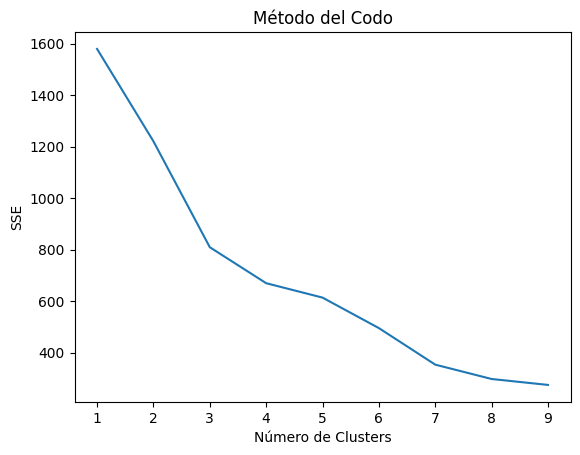

In [96]:
# Inicializamos una lista para guardar los valores de inercia
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)  # Inercia es la suma de los errores cuadráticos

# Trazar el gráfico del método del codo
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 10))
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Método del Codo')
plt.show()

In [97]:
kmeans = KMeans(n_clusters=3, random_state=42)
num_df['cluster'] = kmeans.fit_predict(data_scaled)


In [98]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data_scaled, kmeans.labels_)
print("Silhouette Score:", score)


Silhouette Score: 0.5086003355788192


In [99]:
cluster_means = num_df.groupby('cluster')[['2023II_x', '2024I_x', '2024II_x',
       '2025I_x', '2023II_y', '2024I_y', '2024II_y', '2025I_y', 'PROM_2023II',
       'PROM_2024I', 'PROM_2024II', 'PROM_2025I', 'MAX_2023II', 'MAX_2024I',
       'MAX_2024II', 'MAX_2025I', 'MIN_2023II', 'MIN_2024I', 'MIN_2024II',
       'MIN_2025I']].mean()

cluster_means.reset_index()

periodo,cluster,2023II_x,2024I_x,2024II_x,2025I_x,2023II_y,2024I_y,2024II_y,2025I_y,PROM_2023II,...,PROM_2024II,PROM_2025I,MAX_2023II,MAX_2024I,MAX_2024II,MAX_2025I,MIN_2023II,MIN_2024I,MIN_2024II,MIN_2025I
0,0,1485.222222,1877.111111,1367.777778,1622.888889,105.666667,74.444444,78.333333,82.555556,662.746228,...,740.822012,871.366489,1391.125000,1485.388889,1459.069444,1550.540556,888.097222,1064.763889,1075.402778,969.319444
1,1,174.781250,187.000000,142.406250,195.109375,43.750000,17.984375,20.640625,27.140625,640.519794,...,731.596910,836.244503,1135.879906,1261.248172,1233.355141,1350.615438,705.743469,943.213406,953.667125,973.009578
2,2,0.000000,0.000000,108.833333,262.000000,0.000000,0.000000,15.333333,12.166667,0.000000,...,487.732107,847.709271,0.000000,0.000000,909.187500,1398.770833,0.000000,0.000000,650.895833,1188.562500


In [100]:
cluster_group = num_df.groupby('cluster')['CARRERA (PRIMERA OPCION)'].count()
cluster_group

cluster
0     9
1    64
2     6
Name: CARRERA (PRIMERA OPCION), dtype: int64

In [101]:
cluster_group_0 = num_df[num_df['cluster'] == 0][['CARRERA (PRIMERA OPCION)','2023II_x', '2024I_x', '2024II_x',
       '2025I_x', '2023II_y', '2024I_y', '2024II_y', '2025I_y', 'PROM_2023II',
       'PROM_2024I', 'PROM_2024II', 'PROM_2025I', 'MAX_2023II', 'MAX_2024I',
       'MAX_2024II', 'MAX_2025I', 'MIN_2023II', 'MIN_2024I', 'MIN_2024II',
       'MIN_2025I']]

cluster_group_0

periodo,CARRERA (PRIMERA OPCION),2023II_x,2024I_x,2024II_x,2025I_x,2023II_y,2024I_y,2024II_y,2025I_y,PROM_2023II,...,PROM_2024II,PROM_2025I,MAX_2023II,MAX_2024I,MAX_2024II,MAX_2025I,MIN_2023II,MIN_2024I,MIN_2024II,MIN_2025I
0,ADMINISTRACIÓN,818.0,960.0,695.0,701.0,134.0,89.0,96.0,103.0,678.563504,...,753.420109,880.752878,1366.250,1408.500,1535.250,1506.125,500.125,1008.250,907.125,617.125
2,ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,874.0,1056.0,748.0,916.0,85.0,57.0,61.0,64.0,670.686834,...,742.414209,858.639032,1331.875,1556.375,1563.125,1613.875,605.750,901.500,924.875,452.625
19,CONTABILIDAD,836.0,802.0,644.0,698.0,204.0,101.0,109.0,130.0,677.735993,...,745.815532,882.354227,1367.375,1556.375,1389.625,1461.000,810.750,973.875,903.750,572.625
21,DERECHO,2372.0,2913.0,2247.0,2433.0,146.0,134.0,145.0,134.0,719.569961,...,796.638908,910.528024,1556.375,1538.625,1514.125,1717.370,1070.500,1164.000,1197.250,1288.500
22,ECONOMÍA,612.0,1012.0,727.0,709.0,65.0,66.0,68.0,77.0,756.015783,...,814.589459,958.800385,1518.625,1498.625,1516.375,1599.745,1030.500,1175.250,1155.000,1232.625
44,INGENIERÍA DE SISTEMAS,1519.0,1776.0,1194.0,1385.0,72.0,43.0,46.0,44.0,618.195808,...,729.240433,840.901258,1284.000,1475.250,1493.000,1504.250,964.875,1100.625,1197.250,1282.875
51,INGENIERÍA INDUSTRIAL,1046.0,1302.0,1016.0,1282.0,82.0,77.0,74.0,75.0,640.419026,...,730.531312,855.983969,1345.125,1463.125,1354.125,1573.375,924.875,986.000,1071.625,1202.375
62,MEDICINA HUMANA,3906.0,5383.0,3823.0,5065.0,106.0,55.0,56.0,55.0,627.870882,...,706.259184,802.368210,1477.500,1557.500,1504.250,1527.250,1120.625,1224.000,1297.500,1386.750
69,PSICOLOGÍA,1384.0,1690.0,1216.0,1417.0,57.0,48.0,50.0,61.0,575.658260,...,648.488965,851.970416,1273.000,1314.125,1261.750,1451.875,964.875,1049.375,1024.250,688.375


In [102]:
cluster_group_1 = num_df[num_df['cluster'] == 1]['CARRERA (PRIMERA OPCION)']
cluster_group_1


3                      ADMINISTRACIÓN DE TURISMO
5                                   ANTROPOLOGÍA
6                                    ARQUEOLOGÍA
8                                           ARTE
9     AUDITORÍA EMPRESARIAL Y DEL SECTOR PÚBLICO
                         ...                    
74                          TEC. MED. RADIOLOGÍA
75     TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN
76                 TEC. MED. TERAPIA OCUPACIONAL
77                                   TOXICOLOGÍA
78                                TRABAJO SOCIAL
Name: CARRERA (PRIMERA OPCION), Length: 64, dtype: object

In [103]:
cluster_group_2 = num_df[num_df['cluster'] == 2]['CARRERA (PRIMERA OPCION)']
cluster_group_2

1         ADMINISTRACIÓN DE LA GASTRONOMÍA
4      ADMINISTRACIÓN MARÍTIMA Y PORTUARIA
7                 ARQUITECTURA Y URBANISMO
11               CIENCIA DE LA COMPUTACIÓN
57    LENGUAS, TRADUCCIÓN E INTERPRETACIÓN
60                               MARKETING
Name: CARRERA (PRIMERA OPCION), dtype: object

In [104]:
#inizializamos el PCA
pca = PCA()

#aplicamos e PCA a los datos escalados
pca_result = pca.fit(X)

In [105]:
# Porcentaje de varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

explained_variance

array([7.10992419e-01, 1.79649940e-01, 4.37103512e-02, 2.98751516e-02,
       1.33571352e-02, 6.49617419e-03, 4.24355418e-03, 3.74881814e-03,
       1.99029476e-03, 1.90806063e-03, 1.58221956e-03, 6.99740275e-04,
       6.08679313e-04, 4.05437217e-04, 3.48534831e-04, 2.08553525e-04,
       1.20271536e-04, 4.02748915e-05, 1.07569134e-05, 3.63363411e-06])

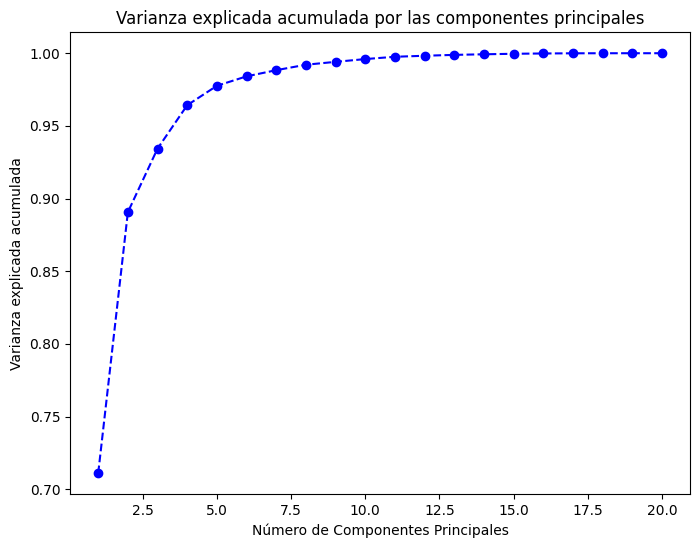

In [106]:
# Visualizar la varianza explicada
plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--', color='b')
plt.title('Varianza explicada acumulada por las componentes principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza explicada acumulada')
plt.show()

In [107]:
# Selecciona las primeras 2 componentes
pca_4 = PCA(n_components=4)
pca_4_result = pca_4.fit_transform(X)


In [108]:
# Crear un DataFrame con las 2 primeras componentes principales
df_pca = pd.DataFrame(pca_4_result, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# # Agregar de vuelta la columna categórica "CARRERA (PRIMERA OPCION)" para referencia
df_pca['Carrera'] = num_df['CARRERA (PRIMERA OPCION)']

df_pca

# # Agregar de vuelta la columna categórica "CARRERA (PRIMERA OPCION)" para referencia
df_pca['cluster'] = num_df['cluster']

df_pca

,PC1,PC2,PC3,PC4,Carrera,cluster
0,971.228439,181.063894,-338.643313,70.868006,ADMINISTRACIÓN,0
1,-974.443343,-1894.226456,229.557406,554.874251,ADMINISTRACIÓN DE LA GASTRONOMÍA,2
2,1193.903241,186.524259,-412.620913,49.588207,ADMINISTRACIÓN DE NEGOCIOS INTERNACIONALES,0
3,-290.274458,169.822001,-519.370791,-60.018638,ADMINISTRACIÓN DE TURISMO,1
4,-942.836296,-1859.118616,114.974867,757.422220,ADMINISTRACIÓN MARÍTIMA Y PORTUARIA,2
...,...,...,...,...,...,...
74,-432.264663,148.016102,42.069391,-189.098842,TEC. MED. RADIOLOGÍA,1
75,-359.738613,74.969239,48.669667,-153.407253,TEC. MED. TERAPIA FÍSICA Y REHABILITACIÓN,1
76,-567.820377,-100.064492,19.211290,-197.066355,TEC. MED. TERAPIA OCUPACIONAL,1
77,-593.985608,43.856175,12.082461,-172.061525,TOXICOLOGÍA,1


In [109]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure(
     layout=go.Layout(
          xaxis_title='Cluster'
     )
)

fig.add_trace(go.Violin(
 
    x=df_pca['cluster'],
    y=df_pca['PC1'], 
    box=dict(visible = True), 
    points='all',
    name = 'Puntaje promedio'

)
)

fig.add_trace(go.Violin(
 
    x=df_pca['cluster'],
    y=df_pca['PC2'], 
    box=dict(visible = True), 
    points='all',
    name = 'Puntaje maximo'

)
)


fig.add_trace(go.Violin(
 
    x=df_pca['cluster'],
    y=df_pca['PC3'], 
    box=dict(visible = True), 
    points='all',
    name = 'Puntaje minimo'

)
)

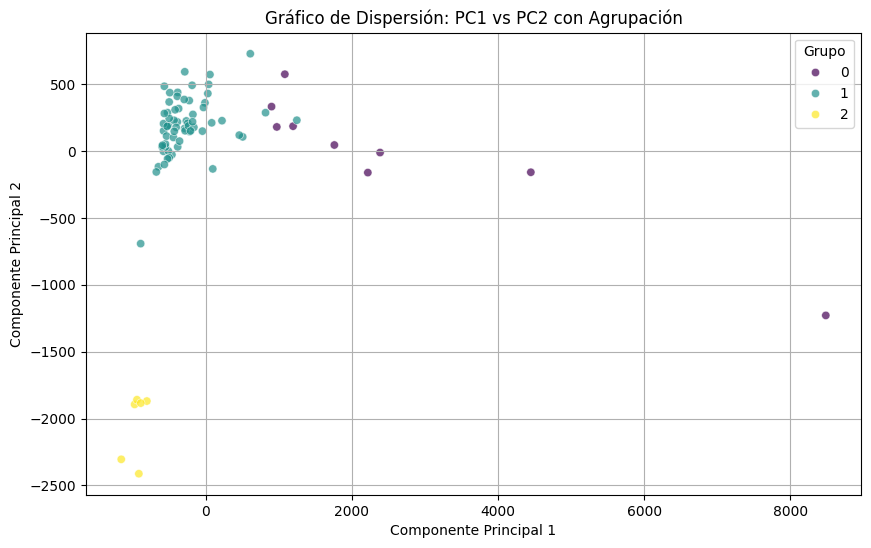

In [110]:
# Supongamos que tienes un DataFrame original llamado df que contiene una columna 'grupo'
# que tiene las etiquetas de grupo.

# Graficar las dos primeras componentes principales con agrupación
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=num_df['cluster'], palette='viridis', alpha=0.7)
plt.title('Gráfico de Dispersión: PC1 vs PC2 con Agrupación')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.legend(title='Grupo')
plt.show()


In [111]:
# Calcular la correlación entre las componentes principales y las variables originales
correlation_matrix = pd.concat([X, df_pca], axis=1).corr()

# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title('Matriz de Correlación entre Variables Originales y Componentes Principales')
plt.show()


ValueError: could not convert string to float: 'ADMINISTRACIÓN'

In [ ]:
# Calcular la varianza explicada acumulada
explained_variance = pca.explained_variance_ratio_

# Crear un gráfico de varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Varianza Explicada por Componente Principal')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()
